In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import json
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms

In [196]:
df1 = pd.read_csv("./data/personal_train.csv", index_col=0)
df2 = pd.read_csv("./data/other_train.csv", index_col=0)

In [197]:
print(pd.__version__)

1.0.1


In [198]:
#moje su len vo vacsom dataframe
attributes_marcel = ["marital-status", "pregnant", "relationship", "education", "education-num", "occupation", 
                     "income", "fnlwgt", "workclass", "hours-per-week", "capital-gain", "capital-loss", "medical_info", 
                     "class"]

In [199]:
data=df2
data1=df1

data.head()

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Michael Atchison,"4214 Kim Path\r\nLake Crystalstad, PA 11945",Asian-Pac-Islander,Married-civ-spouse,Sales,f,13.0,Husband,-0.392165,NaN,...,Bachelors,116358.0,0.0,52.705122,>50K,"{'mean_oxygen':'1.059364548','std_oxygen':'10....",?,50.0,0.0,Self-emp-inc
1,Thomas Whish,USS Obrien\r\nFPO AE 57226,Asian-Pac-Islander,Never-married,?,f,10.0,Own-child,0.272569,123.78125,...,Some-college,243190.0,0.0,45.520761,<=50K,"{'mean_oxygen':'2.557692308','std_oxygen':'14....",China,40.0,0.0,?
2,Michael Lewis,Unit 0924 Box 8905\r\nDPO AP 63128,White,Divorced,Other-service,f,9.0,Unmarried,1.757642,90.15625,...,HS-grad,96840.0,0.0,38.267855,<=50K,"{'mean_oxygen':'1.549331104','std_oxygen':'14....",United-States,40.0,0.0,Private
3,Everett Boyd,"PSC 2908, Box 8120\r\nAPO AA 38330",White,Married-civ-spouse,Craft-repair,f,13.0,Husband,-0.827640,99.28125,...,Bachelors,180439.0,0.0,71.956469,>50K,"{'mean_oxygen':'197.2341137','std_oxygen':'63....",United-States,40.0,0.0,Private
4,Markus Simonton,"97553 Nunez Ford\r\nAndersonville, KS 60178",White,Married-civ-spouse,?,f,10.0,Husband,-0.393304,108.2109375,...,Some-college,115745.0,0.0,52.285074,<=50K,"{'mean_oxygen':'1.617056856','std_oxygen':'16....",United-States,40.0,0.0,?


In [200]:
data1.head()

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Female,1961-10-17
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",46,Male,1972-11-26
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",75,Male,1944-10-28
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",70,Male,1949-02-18
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",30,Male,04/06/1989


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   race              3969 non-null   object 
 3   marital-status    3969 non-null   object 
 4   occupation        3969 non-null   object 
 5   pregnant          3973 non-null   object 
 6   education-num     3972 non-null   float64
 7   relationship      3965 non-null   object 
 8   skewness_glucose  3967 non-null   float64
 9   mean_glucose      3700 non-null   object 
 10  capital-gain      3970 non-null   float64
 11  kurtosis_glucose  3972 non-null   float64
 12  education         3973 non-null   object 
 13  fnlwgt            3969 non-null   float64
 14  class             3965 non-null   float64
 15  std_glucose       3573 non-null   float64
 16  income            3972 non-null   object 


In [202]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3933 non-null   object
 1   address        3933 non-null   object
 2   age            3933 non-null   int64 
 3   sex            3933 non-null   object
 4   date_of_birth  3933 non-null   object
dtypes: int64(1), object(4)
memory usage: 184.4+ KB


In [203]:
data.isnull().sum()

name                  0
address               0
race                 14
marital-status       14
occupation           14
pregnant             10
education-num        11
relationship         18
skewness_glucose     16
mean_glucose        283
capital-gain         13
kurtosis_glucose     11
education            10
fnlwgt               14
class                18
std_glucose         410
income               11
medical_info         18
native-country        9
hours-per-week       15
capital-loss         16
workclass            16
dtype: int64

In [204]:
data1.isnull().sum()

name             0
address          0
age              0
sex              0
date_of_birth    0
dtype: int64

In [205]:
missing = (data.isnull().sum() / data.shape[0])
missing

name                0.000000
address             0.000000
race                0.003515
marital-status      0.003515
occupation          0.003515
pregnant            0.002511
education-num       0.002762
relationship        0.004519
skewness_glucose    0.004017
mean_glucose        0.071052
capital-gain        0.003264
kurtosis_glucose    0.002762
education           0.002511
fnlwgt              0.003515
class               0.004519
std_glucose         0.102937
income              0.002762
medical_info        0.004519
native-country      0.002260
hours-per-week      0.003766
capital-loss        0.004017
workclass           0.004017
dtype: float64

In [206]:
data.nunique()

name                3933
address             3933
race                   5
marital-status         7
occupation            26
pregnant               6
education-num         16
relationship           6
skewness_glucose    3933
mean_glucose        3053
capital-gain          76
kurtosis_glucose    3931
education             16
fnlwgt              3677
class                  2
std_glucose         3536
income                 4
medical_info        3932
native-country        41
hours-per-week        70
capital-loss          51
workclass              9
dtype: int64

In [207]:
data1.nunique()

name             3933
address          3933
age               182
sex                 2
date_of_birth    3690
dtype: int64

# Analyza atributov

## Univariate Analyza

### y - prediction

In [208]:
data["class"].value_counts()

0.0    2953
1.0    1012
Name: class, dtype: int64

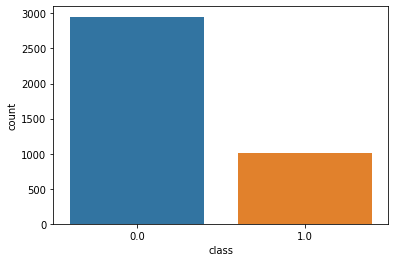

In [209]:
sns.countplot(data=data, x="class")

In [210]:
len(data[data["class"] == 1]) / len(data)

0.25407983931709766

In [211]:
def f(figsize):
    if figsize is not None:
        plt.figure(figsize=figsize)

def univariate_categ_to_class(data, categ_attr, cls="class", figsize=None):
    print(data[categ_attr].value_counts())
        
    f(figsize)
    sns.countplot(data=data, y=categ_attr, hue=cls)
    

In [212]:
def univariate_num(data, num_attr, figsize=None):
    print(data[num_attr].describe())
    
    print("Skewness:", stats.skew(data[num_attr], nan_policy="omit").data) 
    print("Kurtosis:", stats.kurtosis(data[num_attr], nan_policy="omit"))
        
    mean = data[num_attr].mean()
    median = data[num_attr].median()
    mode = data[num_attr].mode()[0]
    
    f(figsize)

    sns.boxplot(data=data, x=num_attr)
    plt.show()
    
    f(figsize)
    
    plt.axvline(mean, linestyle='-', label="mean")
    plt.axvline(median, linestyle='--', label="median")
    plt.axvline(mode, linestyle=':', label="mode")
    
    sns.distplot(data[num_attr], bins=20)
    plt.legend()
    plt.show()
    

In [213]:
def univariate_num_to_class(data, num_attr, cls="class", threshold=0.4, figsize=None):
 
    corr = data[[num_attr,cls]].corr().iloc[0,1]
    print("Korelacia medzi nasim atributom a y:", corr)
    
    if figsize is not None:
        plt.figure(figsize=figsize)

    sns.violinplot(data=data, y=num_attr, x=cls)
    plt.show()

    f(figsize)
    
    sns.distplot(data[data[cls] == 0][num_attr], bins=20, label=cls+"0")
    sns.distplot(data[data[cls] == 1][num_attr], bins=20, label=cls+"1")
    plt.legend()
    plt.show()
    
    if corr > threshold or corr < -threshold:
        f(figsize)
        sns.regplot(data=data, x=num_attr, y=cls, logistic=True)
        plt.show()

#### marital-status

Pozor, je tam whitespace na zaciatku kazdej hodnoty... Teraz nas to avsak extra netrapi

In [214]:
data["marital-status"].unique()

array([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', nan, ' Married-AF-spouse'],
      dtype=object)

 Married-civ-spouse       1861
 Never-married            1257
 Divorced                  549
 Separated                 142
 Widowed                   116
 Married-spouse-absent      41
 Married-AF-spouse           3
Name: marital-status, dtype: int64


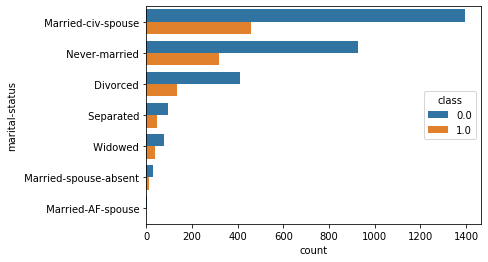

In [215]:
univariate_categ_to_class(data, "marital-status")

Pocet ludi s cukrovkou v jednotlivych kategoriach...

In [216]:
def get_percent_of_class_in_attr(data, attr, class_col="class", class_value=1):
    left = data[attr].value_counts().to_frame()
    right = data[data[class_col] == class_value][attr].value_counts().to_frame()

    lsuffix = "-total"
    rsuffix = "-" + class_col + str(class_value)
    
    leftname = attr + lsuffix
    rightname = attr + rsuffix
    
    joined = left.join(right, how="left", lsuffix=lsuffix, rsuffix=rsuffix).fillna(0)
    
    return (joined[rightname] / joined[leftname]).sort_values(ascending=False)

In [217]:
get_percent_of_class_in_attr(data, "marital-status")

 Separated                0.323944
 Widowed                  0.318966
 Married-spouse-absent    0.268293
 Never-married            0.253779
 Divorced                 0.247723
 Married-civ-spouse       0.247179
 Married-AF-spouse        0.000000
dtype: float64

#### pregnant

In [218]:
data["pregnant"].value_counts()

f        3516
FALSE     201
F         189
t          61
TRUE        3
T           3
Name: pregnant, dtype: int64

In [219]:
mask = data["pregnant"].notna()

In [220]:
pregnant_bool = data["pregnant"][mask].apply(lambda row: True if row is not np.nan and re.match("^(t|T)", row) else False)
pregnant_bool = pregnant_bool.to_frame()

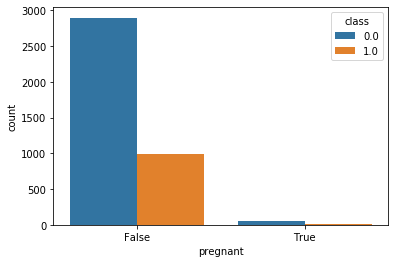

In [221]:
pregnant_data = pregnant_bool.join(data["class"], how="left")

sns.countplot(data=pregnant_data, x="pregnant", hue="class")

In [222]:
pregnant_data['pregnant'].value_counts()

False    3906
True       67
Name: pregnant, dtype: int64

#### relationship

Dalsi whitespace na zaciatku stringov...

In [224]:
data["relationship"].unique()

array([' Husband', ' Own-child', ' Unmarried', ' Not-in-family', ' Wife',
       ' Other-relative', nan], dtype=object)

 Husband           1635
 Not-in-family      981
 Own-child          607
 Unmarried          429
 Wife               195
 Other-relative     118
Name: relationship, dtype: int64


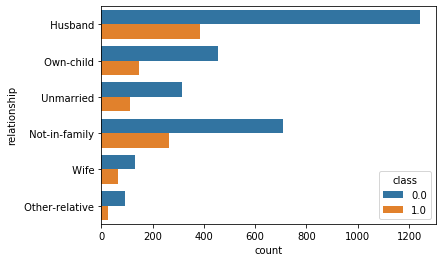

In [225]:
univariate_categ_to_class(data, "relationship")

In [226]:
get_percent_of_class_in_attr(data, "relationship")

 Wife              0.328205
 Not-in-family     0.271152
 Unmarried         0.261072
 Own-child         0.245470
 Husband           0.236697
 Other-relative    0.220339
dtype: float64

#### education

Asi by som to rozdelil do mensieho poctu kategorii...

Znova whitespace...

In [227]:
data["education"].unique()

array([' Bachelors', ' Some-college', ' HS-grad', ' 11th', ' 9th',
       ' Preschool', ' Assoc-acdm', ' Assoc-voc', ' Prof-school', ' 12th',
       ' Doctorate', ' 5th-6th', ' 10th', ' Masters', ' 7th-8th',
       ' 1st-4th', nan], dtype=object)

Teraz to rovno upravim, aby som nemusel pocitat s danou medzerou

In [228]:
data["education"] = data["education"].apply(lambda row: row.strip() if row is not np.nan else row)

data["education"].unique()

array(['Bachelors', 'Some-college', 'HS-grad', '11th', '9th', 'Preschool',
       'Assoc-acdm', 'Assoc-voc', 'Prof-school', '12th', 'Doctorate',
       '5th-6th', '10th', 'Masters', '7th-8th', '1st-4th', nan],
      dtype=object)

HS-grad         1328
Some-college     863
Bachelors        624
Masters          215
Assoc-voc        166
Assoc-acdm       158
11th             128
10th             119
7th-8th           89
Prof-school       68
12th              58
Doctorate         52
9th               47
5th-6th           36
1st-4th           16
Preschool          6
Name: education, dtype: int64


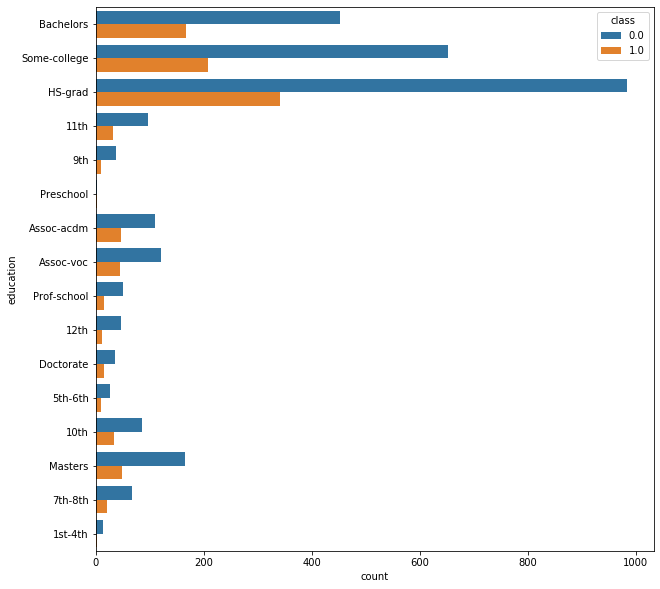

In [229]:
univariate_categ_to_class(data, "education", figsize=(10,10))

https://sites.google.com/site/complexdataminingproject/ - na tejto stranke su opisane niektore atributy, s ktorymi pracujeme

>  Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate. 

Deti malokedy mavaju cukrovku, tak kludne mozeme kategoriu Attending-school, co obsahuje preschool a skupinu K-12, co reprezentuje 12 rocnikov od elementary school po high school.

Tipujem, ze HS-grad znamena, ze dany clovek nepokracoval na vysoku skolu, takze to nechame ako samostatnu kategoriu.

Problemom vsak je, ze mame tu kategoriu some-college, ktora je dost zastupena, ale tak aj je napriklad kategoria Bachelor. Takze zatial nejdem mergovat kategorie pre vysokoskolske stupne

In [230]:
data["simple-edu"] = data["education"].copy()

In [231]:
def simplify_education(row):
        
    edu = row["education"]
        
    if edu is np.nan:
        row["simple-edu"] = edu
        
    elif re.match("^([0-9][a-zA-Z])|(1[0-2][a-zA-Z])", edu) or edu == "Preschool":
        row["simple-edu"] = "Attending-school"
        
    elif edu in ["Assoc-acdm", "Assoc-voc", "Prof-school"]:
        row["simple-edu"] = "Edu after HS, no uni"
        
    elif edu in ["Masters", "Doctorate"]:
        row["simple-edu"] = "Masters/Doctorate"
        
    else:
        row["simple-edu"] = row["education"]
    
    return row
        
data = data.apply(simplify_education, axis=1)

HS-grad                 1328
Some-college             863
Bachelors                624
Attending-school         499
Edu after HS, no uni     392
Masters/Doctorate        267
Name: simple-edu, dtype: int64


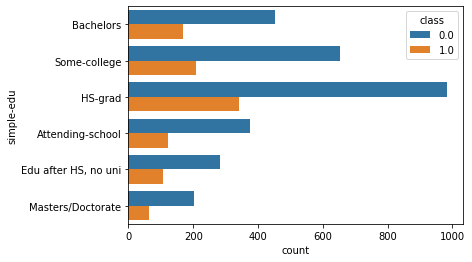

In [232]:
univariate_categ_to_class(data, "simple-edu")

In [233]:
get_percent_of_class_in_attr(data, "simple-edu")

Edu after HS, no uni    0.272959
Bachelors               0.267628
HS-grad                 0.256777
Attending-school        0.246493
Some-college            0.241020
Masters/Doctorate       0.235955
dtype: float64

#### race

In [234]:
data["race"].unique()

array([' Asian-Pac-Islander', ' White', ' Amer-Indian-Eskimo', ' Black',
       ' Other', nan], dtype=object)

 White                 3390
 Black                  391
 Asian-Pac-Islander     128
 Amer-Indian-Eskimo      34
 Other                   26
Name: race, dtype: int64


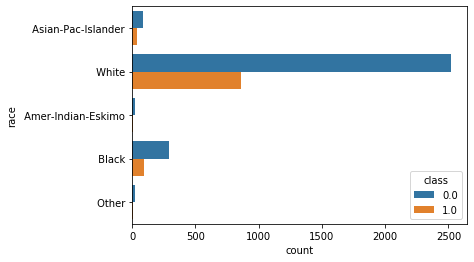

In [235]:
univariate_categ_to_class(data, "race")

In [236]:
get_percent_of_class_in_attr(data, "race")

 Asian-Pac-Islander    0.296875
 Amer-Indian-Eskimo    0.264706
 White                 0.253097
 Black                 0.248082
 Other                 0.230769
dtype: float64

#### native country

In [237]:
data["native-country"].value_counts()

 United-States         3567
 ?                       80
 Mexico                  73
 Philippines             28
 El-Salvador             18
 Puerto-Rico             15
 Canada                  14
 England                 13
 Cuba                    13
 India                   12
 Germany                 12
 Vietnam                 10
 Italy                    9
 South                    8
 Jamaica                  8
 China                    8
 Poland                   7
 Guatemala                7
 Taiwan                   7
 Iran                     7
 Japan                    6
 Columbia                 6
 Dominican-Republic       5
 Honduras                 4
 Peru                     4
 Portugal                 4
 Haiti                    3
 France                   3
 Thailand                 3
 Hong                     3
 Scotland                 3
 Yugoslavia               2
 Trinadad&Tobago          2
 Ireland                  2
 Ecuador                  2
 Nicaragua          

 United-States         3567
 ?                       80
 Mexico                  73
 Philippines             28
 El-Salvador             18
 Puerto-Rico             15
 Canada                  14
 England                 13
 Cuba                    13
 India                   12
 Germany                 12
 Vietnam                 10
 Italy                    9
 South                    8
 Jamaica                  8
 China                    8
 Poland                   7
 Guatemala                7
 Taiwan                   7
 Iran                     7
 Japan                    6
 Columbia                 6
 Dominican-Republic       5
 Honduras                 4
 Peru                     4
 Portugal                 4
 Haiti                    3
 France                   3
 Thailand                 3
 Hong                     3
 Scotland                 3
 Yugoslavia               2
 Trinadad&Tobago          2
 Ireland                  2
 Ecuador                  2
 Nicaragua          

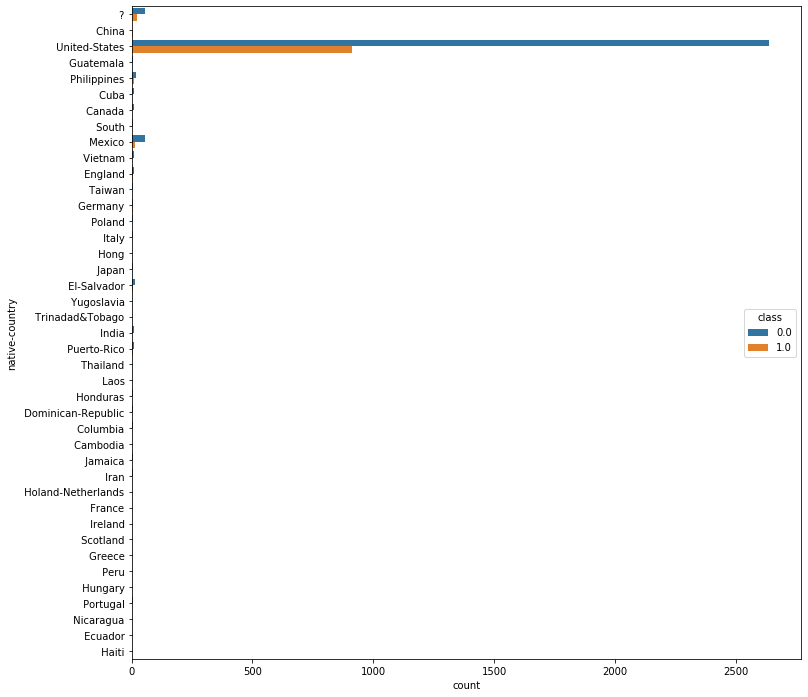

In [238]:
univariate_categ_to_class(data, "native-country",figsize=(12,12))

In [239]:
get_percent_of_class_in_attr(data,"native-country")

 Cambodia              1.000000
 Laos                  1.000000
 China                 0.625000
 Trinadad&Tobago       0.500000
 Guatemala             0.428571
 Germany               0.416667
 South                 0.375000
 Jamaica               0.375000
 Italy                 0.333333
 Hong                  0.333333
 France                0.333333
 England               0.307692
 ?                     0.287500
 Philippines           0.285714
 Puerto-Rico           0.266667
 United-States         0.255957
 Peru                  0.250000
 El-Salvador           0.222222
 Mexico                0.219178
 Dominican-Republic    0.200000
 Japan                 0.166667
 Columbia              0.166667
 Cuba                  0.153846
 Iran                  0.142857
 Poland                0.142857
 Canada                0.142857
 Taiwan                0.142857
 Vietnam               0.100000
 India                 0.083333
 Honduras              0.000000
 Ireland               0.000000
 Scotlan

Pri pozorovaní "native-country" vidíme, že nemá zmysel rátať so všetkými dátami. Najväčšou vzorkou sú občania USA. Zvyšok budeme musieť zgroupovať. Percentúalne vyjadrenie cukrovkárov poďla krajiny pôvodu nám núka možnosť odstrániť z datasetu krajiny, ktoré majú 100% a 0%. 

#### age

In [240]:
df1["age"].unique()

array([   58,    46,    75,    70,    30,    61,    64,    53,    48,
          39,    47,    63,    36,    57,    34,    -1,    55,    50,
          38,    71,    49,    25,    62,    51,    42,  3800,    40,
          32, -4400,    68,    31,    37,  5400,    43,  5900,    59,
       -5200,    69,    45,  4500,  3700,    41,  5800,    99,    81,
          54,  5100, -4300,    35,    60, -4700,    67,    44, -5500,
          18,    56,    78,    29,  6500,    65,    66, -3900,  5200,
       -3200, -4800,  4300,    33,  5300, -6200,    73, -6300,    77,
       -5900,    52, -5800,     3,    28,    27,    19, -4900,  4800,
       -3300,  5500, -3400,  7300,    87, -6600,    22,  6300, -4600,
        3200,  4200,  3600, -5000, -5600,    20,    26,  5000,    82,
          72, -5300,  3000, -3500,  4900, -2300,  3400,  6200, -6400,
       -6700, -6800,  4400,  3300, -4100,  7200,    86, -7700, -5100,
          74,    83,  2900, -7400,  6800, -3800, -5700,  6400,    90,
        6100,  4000,

In [241]:
print("Pocet zapornych hodnot:", (data1["age"] < 0).sum())
neg_age = data1["age"][(data1["age"] < 0)]
neg_age

Pocet zapornych hodnot: 195


15        -1
34     -4400
53     -5200
87     -4300
96     -4700
        ... 
3867   -6600
3891   -4300
3892   -6000
3918   -5000
3920   -4600
Name: age, Length: 195, dtype: int64

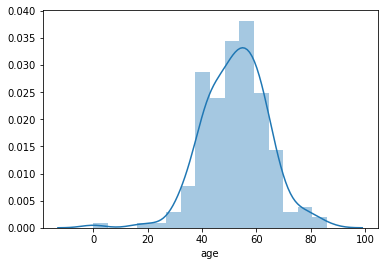

In [242]:
neg_age = neg_age / -100
sns.distplot(neg_age)

Pocet normalnych hodnot: 3538


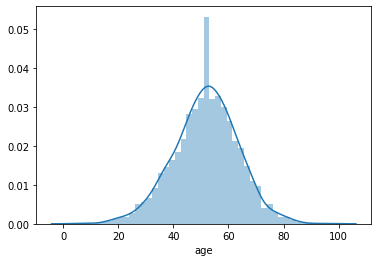

In [243]:
print("Pocet normalnych hodnot:", ((data1["age"] > 0) & (data1["age"] <= 100)).sum())
norm_age = data1["age"][(data1["age"] > 0) & (data1["age"] <= 100)]
sns.distplot(norm_age)

Pocet velkych kladnych hodnot: 200


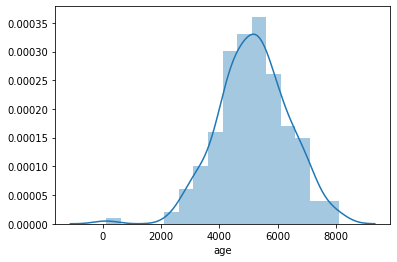

In [244]:
print("Pocet velkych kladnych hodnot:", (data1["age"] > 100).sum())
pos_age = data1["age"][data1["age"] > 100]
sns.distplot(pos_age)

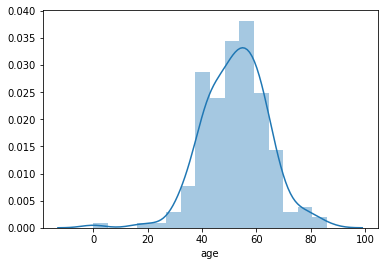

In [245]:
pos_age = pos_age / 100
sns.distplot(neg_age)

#### sex

In [246]:
df1["sex"].unique()

array([' Female', ' Male'], dtype=object)

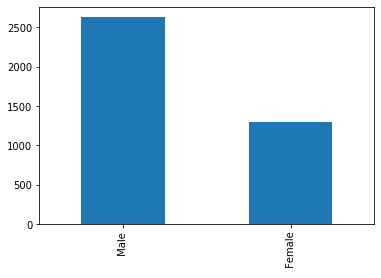

In [247]:
df1.sex.value_counts().plot(kind='bar')

#### education-num

count    3972.000000
mean       10.087865
std         2.541340
min         1.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        16.000000
Name: education-num, dtype: float64
Skewness: -0.2753803626413893
Kurtosis: 0.6364151029333103


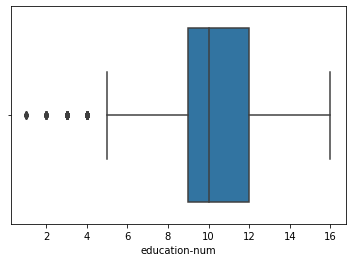

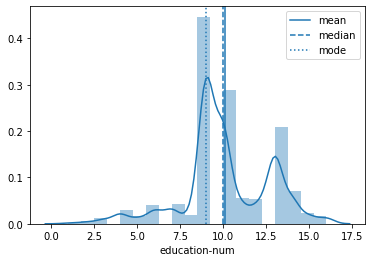

In [248]:
univariate_num(data, "education-num")

Korelacia medzi nasim atributom a y: 0.009046166634345468


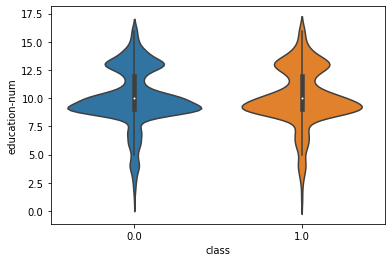

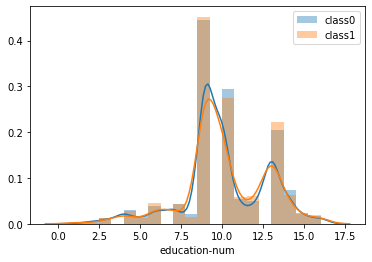

In [249]:
univariate_num_to_class(data, "education-num")

#### occupation

Je tam viacero duplicitnych hodnot, ktore su len zle zformatovane, tak, aby sme mali lepsiu predstavu o pocetnosti jednotlivych pravych hodnot, tak to treba trochu upravit...

In [250]:
print(data["occupation"].nunique())
data["occupation"].unique()

26


array([' Sales', ' ?', ' Other-service', ' Craft-repair',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Exec-managerial',
       ' Adm_clerical', ' Handlers_cleaners', ' Transport-moving',
       ' Protective-serv', ' Tech-support', ' Adm-clerical',
       ' Prof-specialty', ' Farming-fishing', nan, ' Craft_repair',
       ' Prof_specialty', ' Exec_managerial', ' Transport_moving',
       ' Tech_support', ' Priv-house-serv', ' Protective_serv',
       ' Machine_op_inspct', ' Other_service', ' Farming_fishing',
       ' Armed-Forces'], dtype=object)

In [251]:
data["occupation"] = data["occupation"].apply(lambda row: np.nan if row is not np.nan and row.strip() == "?" else row)
data["occupation"] = data["occupation"].apply(lambda row: row.strip().replace("_", "-") if row is not np.nan else row)

print(data["occupation"].nunique())
data["occupation"].unique()

14


array(['Sales', nan, 'Other-service', 'Craft-repair', 'Handlers-cleaners',
       'Machine-op-inspct', 'Exec-managerial', 'Adm-clerical',
       'Transport-moving', 'Protective-serv', 'Tech-support',
       'Prof-specialty', 'Farming-fishing', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

Craft-repair         528
Prof-specialty       502
Exec-managerial      485
Adm-clerical         480
Sales                437
Other-service        403
Machine-op-inspct    243
Transport-moving     197
Handlers-cleaners    162
Farming-fishing      106
Tech-support         106
Protective-serv       73
Priv-house-serv       12
Armed-Forces           1
Name: occupation, dtype: int64


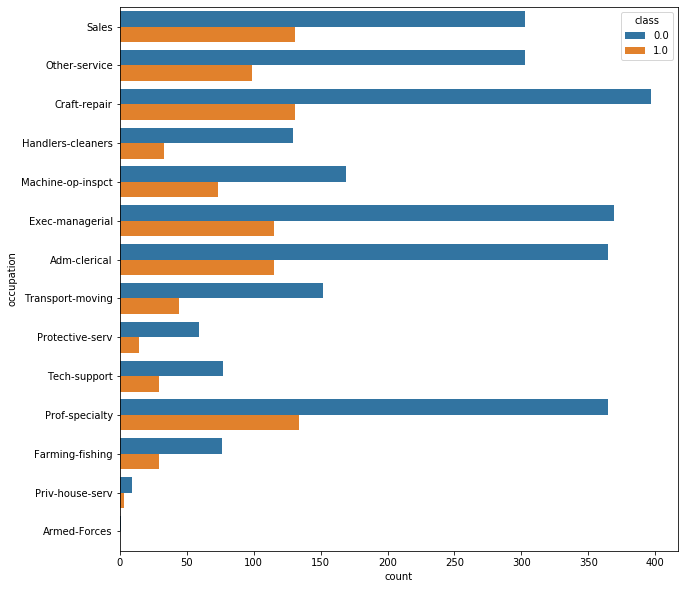

In [252]:
univariate_categ_to_class(data, "occupation", figsize=(10,10))

In [253]:
get_percent_of_class_in_attr(data, "occupation")

Machine-op-inspct    0.300412
Sales                0.299771
Tech-support         0.273585
Farming-fishing      0.273585
Prof-specialty       0.266932
Priv-house-serv      0.250000
Craft-repair         0.248106
Other-service        0.245658
Adm-clerical         0.239583
Exec-managerial      0.237113
Transport-moving     0.223350
Handlers-cleaners    0.203704
Protective-serv      0.191781
Armed-Forces         0.000000
dtype: float64

#### income

In [254]:
data["income"].unique()

array(['>50K', ' <=50K', ' >50K', '<=50K', nan], dtype=object)

In [255]:
data["income"] = data["income"].apply(lambda row: row.strip() if row is not np.nan else row)

data["income"].unique()

array(['>50K', '<=50K', nan], dtype=object)

<=50K    3002
>50K      970
Name: income, dtype: int64


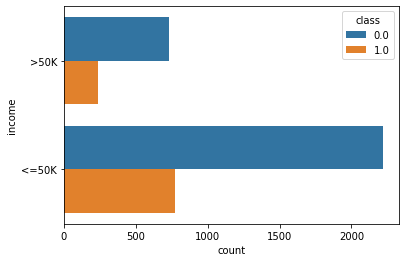

In [256]:
univariate_categ_to_class(data, "income")

In [257]:
get_percent_of_class_in_attr(data, "income")

<=50K    0.256496
>50K     0.246392
dtype: float64

#### fnlwgt

count      3969.000000
mean     188712.373898
std      102553.561943
min       19847.000000
25%      118551.000000
50%      178922.000000
75%      234743.000000
max      806316.000000
Name: fnlwgt, dtype: float64
Skewness: 1.1387625896901103
Kurtosis: 2.705120304969035


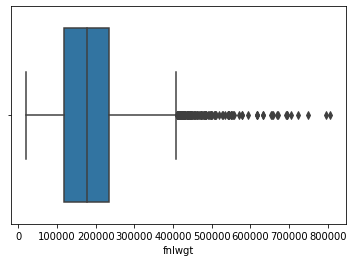

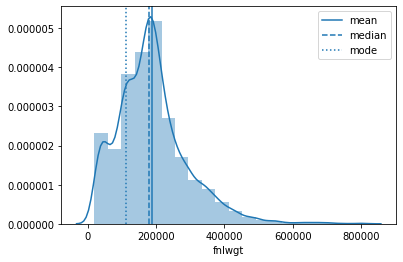

In [258]:
univariate_num(data, "fnlwgt")

Korelacia medzi nasim atributom a y: -0.01147791566611556


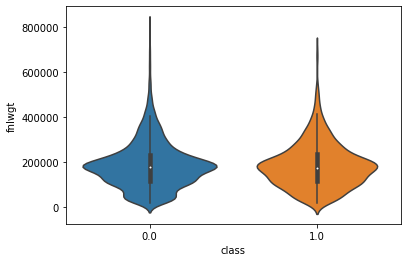

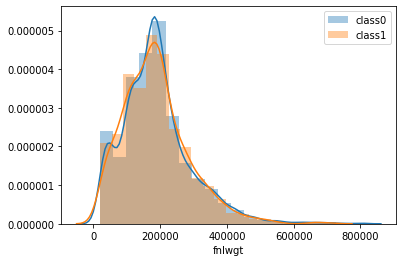

In [259]:
univariate_num_to_class(data, "fnlwgt")

#### workclass

In [260]:
data["workclass"].unique()

array([' Self-emp-inc', ' ?', ' Private', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Local-gov', nan, ' Never-worked',
       ' Without-pay'], dtype=object)

In [261]:
data["workclass"] = data["workclass"].apply(lambda row: row.strip() if row is not np.nan else row)
data["workclass"] = data["workclass"].apply(lambda row: np.nan if row == "?" else row)

data["workclass"].unique()

array(['Self-emp-inc', nan, 'Private', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Local-gov', 'Never-worked', 'Without-pay'],
      dtype=object)

Private             2782
Self-emp-not-inc     296
Local-gov            257
State-gov            145
Self-emp-inc         132
Federal-gov          119
Never-worked           2
Without-pay            1
Name: workclass, dtype: int64


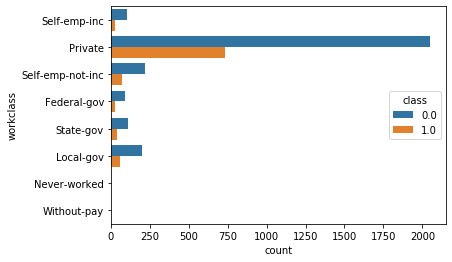

In [262]:
univariate_categ_to_class(data, "workclass")

In [263]:
get_percent_of_class_in_attr(data, "workclass")

Never-worked        0.500000
Private             0.262401
State-gov           0.262069
Self-emp-not-inc    0.243243
Federal-gov         0.218487
Local-gov           0.217899
Self-emp-inc        0.212121
Without-pay         0.000000
dtype: float64

#### hours-per-week

count    3968.000000
mean       40.323337
std        12.086865
min         2.000000
25%        40.000000
50%        40.000000
75%        45.000000
max        99.000000
Name: hours-per-week, dtype: float64
Skewness: 0.2478814975231514
Kurtosis: 2.888095246759577


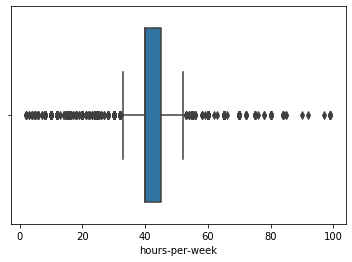

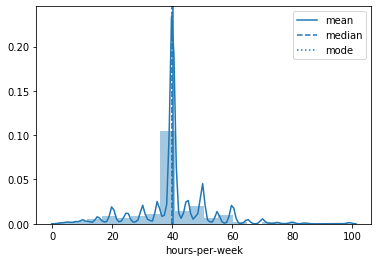

In [264]:
univariate_num(data, "hours-per-week")

Korelacia medzi nasim atributom a y: -0.021488043150210905


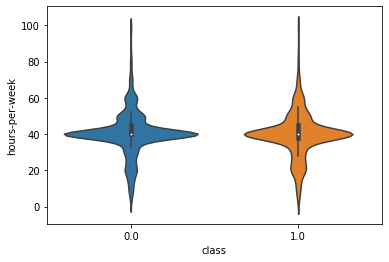

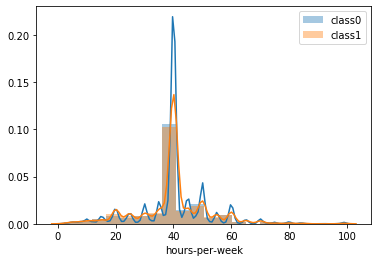

In [265]:
univariate_num_to_class(data, "hours-per-week")

#### capital-gain

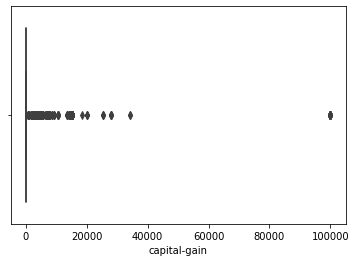

In [266]:
sns.boxplot(data["capital-gain"])

In [267]:
len(data)

3983

Ako mozno vidiet, toto sa ani neoplati rozoberat, lebo skoro vsetky zaznamy maju 0, co moze sice znamenat nieco, ale skor si myslim, ze len je to nejaka null hodnota

In [268]:
print(((data["capital-gain"] == 0) & (data["capital-loss"] == 0)).sum())
print(((data["capital-gain"] > 0) & (data["capital-loss"] == 0)).sum())
print(((data["capital-gain"] == 0) & (data["capital-loss"] > 0)).sum())

3452
318
185


In [269]:
print((data["capital-gain"] == 0).sum())
(data["capital-gain"] == 0).sum() / len(data)

3651


0.9166457444137585

Pre kompletnost mozem sa zaoberat tymi zaznamami, ktore su nenulove, no i ked by som tam nieco zaujimaveho nasiel, je tu velmi vela nulovych hodnot, ktore nemam ako optimalne vyplnit...

Rychlo este skontrolujeme, ci nahodou nie je nejaka zavislost medzi nulovymi hodnotami a prediction y, no pochybujem...
Ocakavame okolo 90% ludi z oboch kategorii, aby mali 0 capital-gain

In [270]:
print("Pocet cukrovkarov s capital-gain = 0:", len(data[(data["capital-gain"] == 0) & (data["class"] == 1)]))
print("Pocet nie-cukrovkarov s capital-gain = 0:", len(data[(data["capital-gain"] == 0) & (data["class"] == 0)]))

print("Pocet cukrovkarov:", (data["class"] == 1).sum())
print("Pocet nie-cukrovkarov:", (data["class"] == 0).sum())

Pocet cukrovkarov s capital-gain = 0: 940
Pocet nie-cukrovkarov s capital-gain = 0: 2694
Pocet cukrovkarov: 1012
Pocet nie-cukrovkarov: 2953


Obi dve hodnoty reprezentuju okolo 90% ludi z kazdej kategorie... Takze tam nie nic, ako sme ocakavali

In [271]:
no_zeros = data[data["capital-gain"] != 0]


count      319.000000
mean     12503.551724
std      21573.772145
min        594.000000
25%       3411.000000
50%       6723.000000
75%      13550.000000
max      99999.000000
Name: capital-gain, dtype: float64
Skewness: 3.545317021051369
Kurtosis: 11.537771038444975


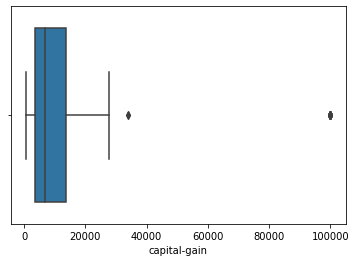

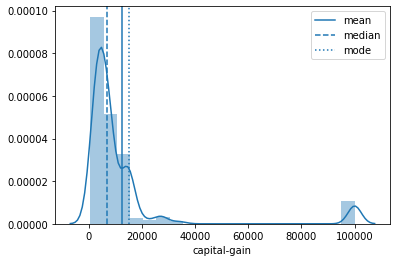

In [272]:
univariate_num(no_zeros, "capital-gain")

Korelacia medzi nasim atributom a y: 0.0003043223551130257


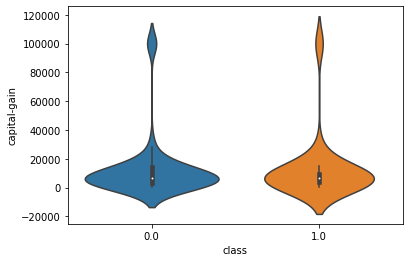

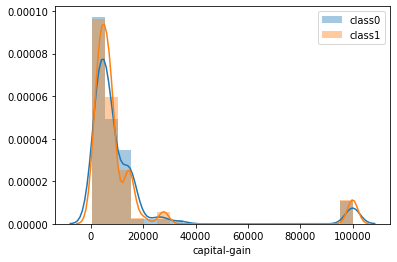

In [273]:
univariate_num_to_class(no_zeros, "capital-gain")

#### capital-loss

Ako pri capital-gain, je tu velke mnozstvo nul...

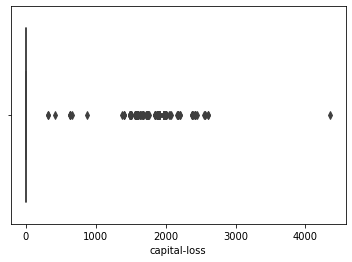

In [274]:
sns.boxplot(data=data, x="capital-loss")

In [275]:
print((data["capital-loss"] == 0).sum())
(data["capital-loss"] == 0).sum() / len(data)

3782


0.9495355259854381

In [276]:
print("Pocet cukrovkarov s capital-loss = 0:", len(data[(data["capital-loss"] == 0) & (data["class"] == 1)]))
print("Pocet nie-cukrovkarov s capital-loss = 0:", len(data[(data["capital-loss"] == 0) & (data["class"] == 0)]))

print("Pocet cukrovkarov:", (data["class"] == 1).sum())
print("Pocet nie-cukrovkarov:", (data["class"] == 0).sum())

Pocet cukrovkarov s capital-loss = 0: 963
Pocet nie-cukrovkarov s capital-loss = 0: 2806
Pocet cukrovkarov: 1012
Pocet nie-cukrovkarov: 2953


Znova 0 pre capital-loss nic neznamena, este sa pozrieme na nenulove hodnoty

In [277]:
no_zeros = data[data["capital-loss"] != 0]
len(no_zeros)

201

count     185.000000
mean     1830.464865
std       416.937150
min       323.000000
25%      1628.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: capital-loss, dtype: float64
Skewness: 0.1625630032149936
Kurtosis: 9.17948139722285


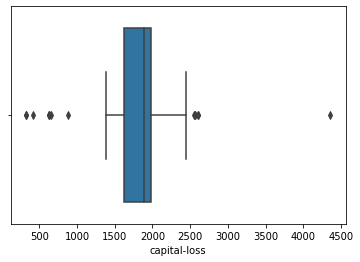

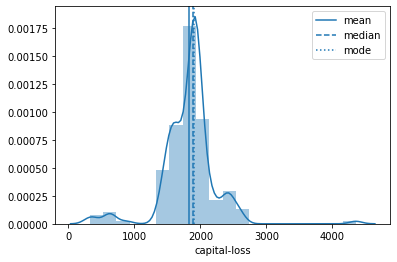

In [278]:
univariate_num(no_zeros, "capital-loss")

Korelacia medzi nasim atributom a y: 0.0020948548109055395


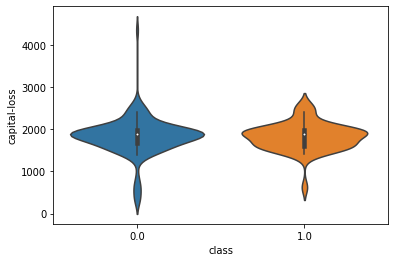

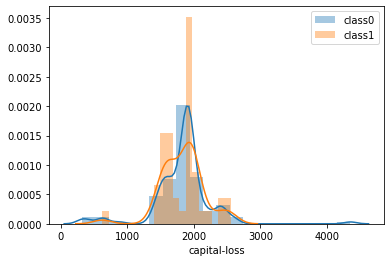

In [279]:
univariate_num_to_class(no_zeros, "capital-loss")

### medical_info

Ako mozno vidiet, tak v tomto atribute su skryte 4 atributy funkcie mnozstva kyslika, konkretne:
- mean
- std
- skewness
- kurtosis

Ma to tvar JSONu

In [280]:
data["mean_oxygen"] = np.nan
data["std_oxygen"] = np.nan
data["kurtosis_oxygen"] = np.nan
data["skewness_oxygen"] = np.nan

In [281]:
data["medical_info"].isna().sum()

18

In [282]:
def get_oxygen_stats(row):
    
    string = row["medical_info"]
    
    if string is np.nan:
        return row
    
    string = string.replace("\'", "\"")
    di = json.loads(string)
    
    for k in di.keys():
        row[k] = float(di[k])
        
    return row

data = data.apply(get_oxygen_stats, axis=1)

In [283]:
print("Pocet chybajucich merani:", data["medical_info"].isna().sum())

print(data["mean_oxygen"].isna().sum())
print(data["std_oxygen"].isna().sum())
print(data["kurtosis_oxygen"].isna().sum())
print(data["skewness_oxygen"].isna().sum())

Pocet chybajucich merani: 18
18
18
18
18


#### mean_oxygen

Z tychto chybajucich hodnot sa da vycitat, ze pokial existoval zaznam medical_info, tak vzdy obsahoval 4 hodnoty danych atributov, teda neboli zaznamy, ktore mali 3 a menej, inac by sme teraz ich nasli

count    3965.000000
mean       18.436913
std        34.699163
min         0.213211
25%         2.069398
50%         3.237458
75%        12.647993
max       217.371238
Name: mean_oxygen, dtype: float64
Skewness: 2.629338039722884
Kurtosis: 6.570659638187301


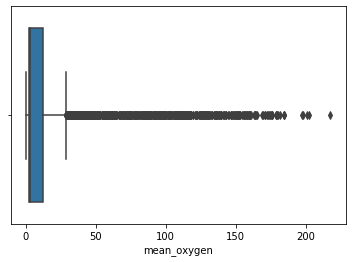

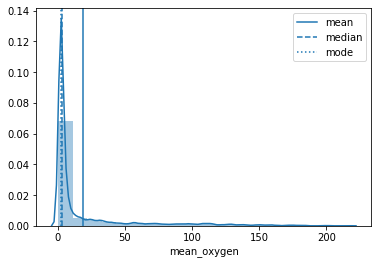

In [284]:
univariate_num(data, "mean_oxygen")

Korelacia medzi nasim atributom a y: 0.5171446494998428


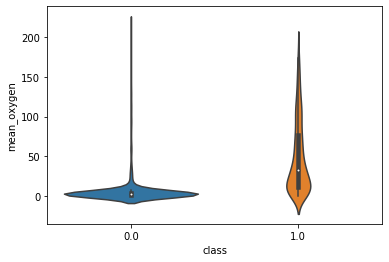

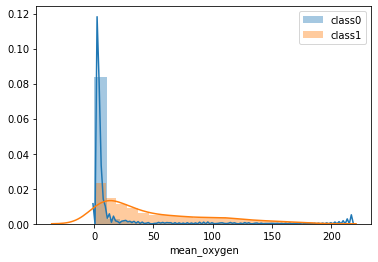

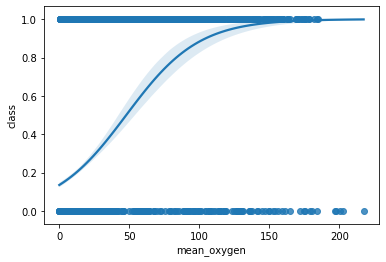

In [285]:
univariate_num_to_class(data, "mean_oxygen")

In [286]:
data[data["class"] == 0]["mean_oxygen"].describe()

count    2940.000000
mean        7.949071
std        21.940569
min         0.213211
25%         1.840719
50%         2.604097
75%         4.148411
max       217.371238
Name: mean_oxygen, dtype: float64

In [287]:
data[data["class"] == 1]["mean_oxygen"].describe()

count    1008.000000
mean       49.150598
std        45.400305
min         0.486622
25%        12.120819
50%        32.540552
75%        77.149666
max       184.525920
Name: mean_oxygen, dtype: float64

#### std_oxygen

count    3965.000000
mean       31.174690
std        22.260027
min         7.370432
25%        15.065441
50%        20.594663
75%        43.253607
max       110.642211
Name: std_oxygen, dtype: float64
Skewness: 1.2001285748384394
Kurtosis: 0.22394821030145895


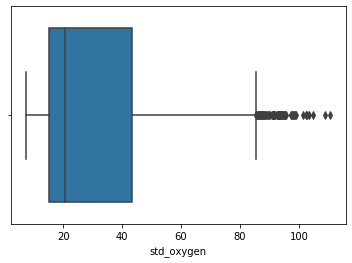

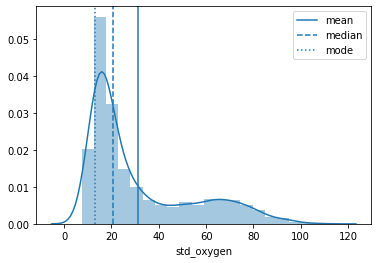

In [288]:
univariate_num(data, "std_oxygen")

Korelacia medzi nasim atributom a y: 0.6487169549813234


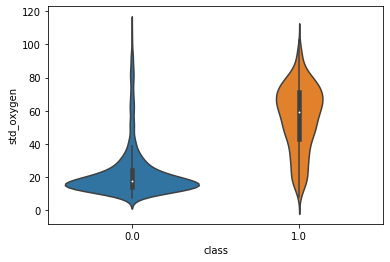

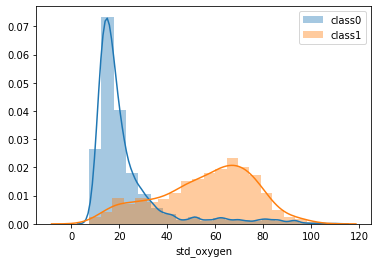

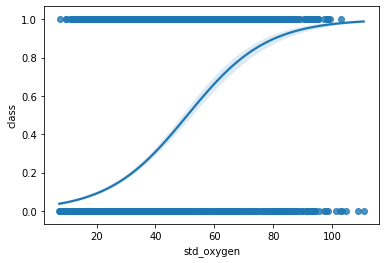

In [289]:
univariate_num_to_class(data, "std_oxygen")

Ako mozme vidiet, tak cukrovkari maju okrem toho, ze viac kyslika v krvi, tak aj nestabilnejsiu hladinu

#### kurtosis_oxygen

count    3965.000000
mean        7.405534
std         4.803379
min        -2.597872
25%         3.631537
50%         7.771753
75%        10.258976
max        34.539844
Name: kurtosis_oxygen, dtype: float64
Skewness: 0.601016622919238
Kurtosis: 1.4111487019490658


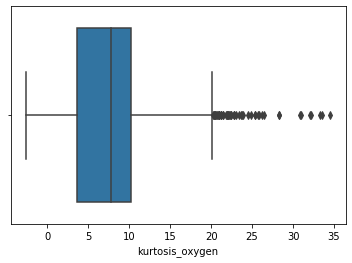

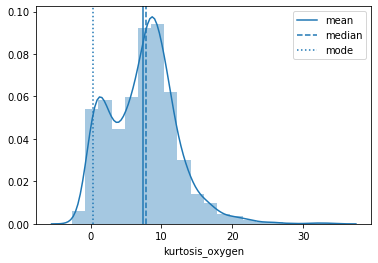

In [290]:
univariate_num(data, "kurtosis_oxygen")

Korelacia medzi nasim atributom a y: -0.5567495927644545


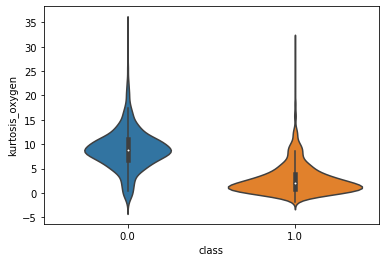

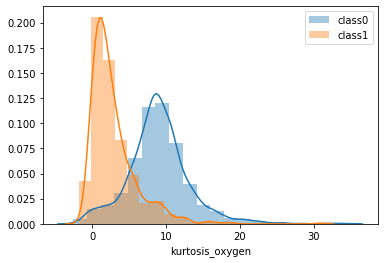

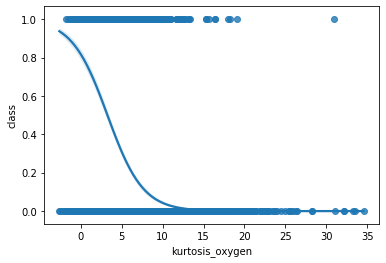

In [291]:
univariate_num_to_class(data, "kurtosis_oxygen")

Toto bolo ocakavane, kedze cukrovkari maju velky std, tak teda dana distribucia bude malo spicata, oproti nie-cukrovkarom, ktori maju stabilnu konkretnu hodnotu hladiny kyslika v krvi (male std)

#### skewness_oxygen

count    3965.000000
mean       91.046280
std       108.251236
min        -1.976976
25%        12.855779
50%        68.299049
75%       126.739185
max      1191.000837
Name: skewness_oxygen, dtype: float64
Skewness: 3.188876061889201
Kurtosis: 18.480512754832816


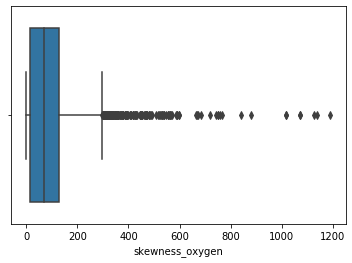

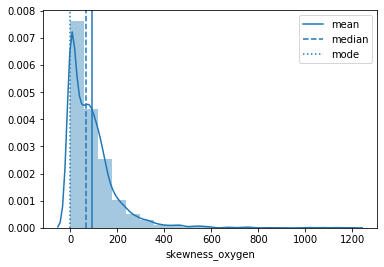

In [292]:
univariate_num(data, "skewness_oxygen")

Korelacia medzi nasim atributom a y: -0.3912290395173166


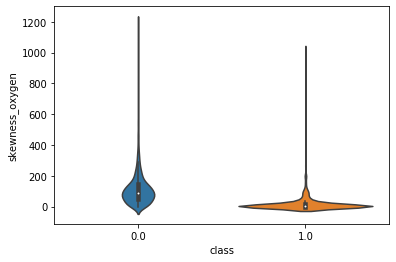

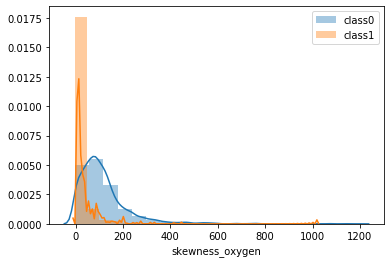

In [293]:
univariate_num_to_class(data, "skewness_oxygen")

#### skewness_glucose

count    3967.000000
mean        4.225103
std         9.677499
min        -1.755332
25%        -0.120762
50%         0.376293
75%         2.090947
max        68.101622
Name: skewness_glucose, dtype: float64
Skewness: 2.867133936210527
Kurtosis: 8.179563459492428


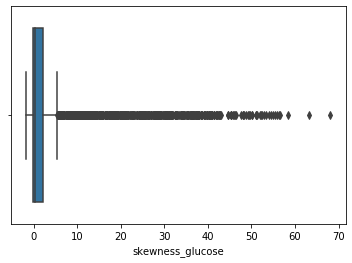

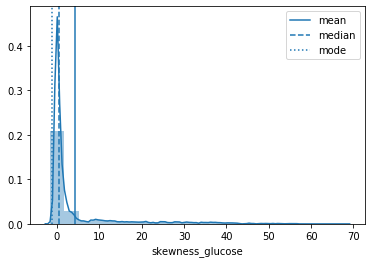

In [294]:
univariate_num(data, "skewness_glucose")

Korelacia medzi nasim atributom a y: 0.6820327961771646


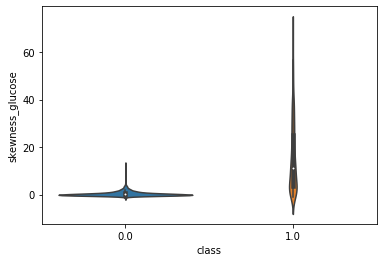

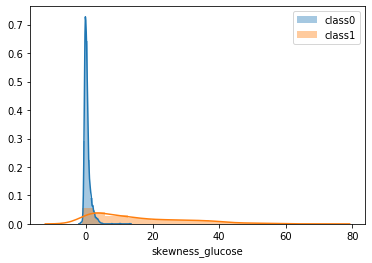

C:\Users\makoh\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


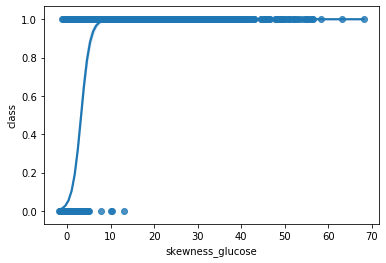

In [295]:
univariate_num_to_class(data, "skewness_glucose")

#### kurtosis_glucose

count    3972.000000
mean        0.951313
std         1.611585
min        -1.641515
25%         0.070122
50%         0.310279
75%         0.773237
max         8.069522
Name: kurtosis_glucose, dtype: float64
Skewness: 2.035654489580185
Kurtosis: 3.2995618648543568


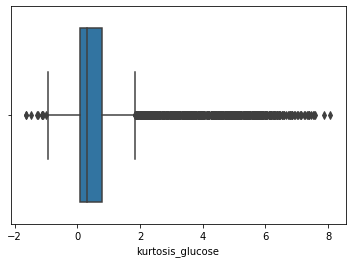

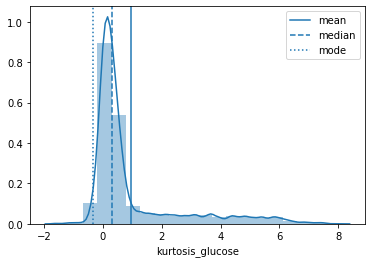

In [296]:
univariate_num(data,"kurtosis_glucose")

Korelacia medzi nasim atributom a y: 0.7899942298791245


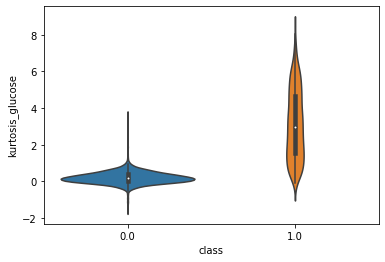

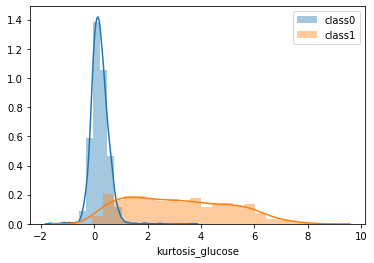

C:\Users\makoh\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


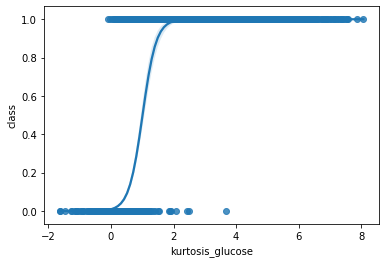

In [297]:
univariate_num_to_class(data, "kurtosis_glucose")

#### mean_glucose

Toto budeme musiet pretipovat!!!!!

In [298]:
data['mean_glucose'] = pd.to_numeric(data['mean_glucose'], errors= 'coerce')


count    3570.000000
mean      100.968542
std        33.681471
min         6.187500
25%        87.380859
50%       110.449219
75%       124.082031
max       189.734375
Name: mean_glucose, dtype: float64
Skewness: -1.0315009630390364
Kurtosis: 0.4128590419576348


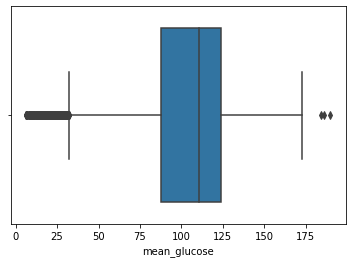

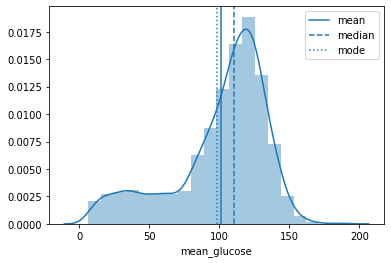

In [299]:
univariate_num(data, "mean_glucose")

Korelacia medzi nasim atributom a y: -0.7727071655634699


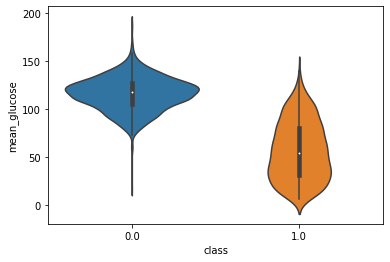

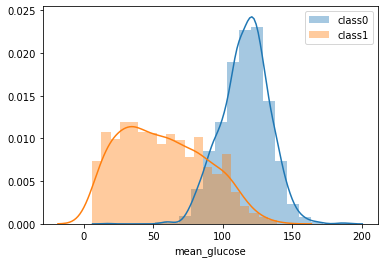

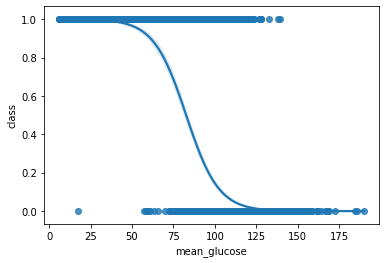

In [300]:
univariate_num_to_class(data, "mean_glucose")

#### std_glucose

count    3573.000000
mean       45.173588
std         7.696647
min        25.695250
25%        40.084015
50%        45.869299
75%        50.423010
max        91.206475
Name: std_glucose, dtype: float64
Skewness: 0.05810012988656475
Kurtosis: 0.8451044050177288


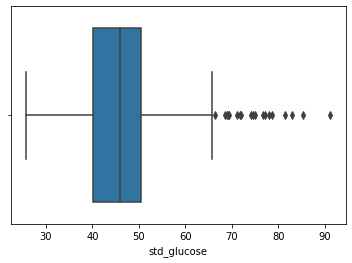

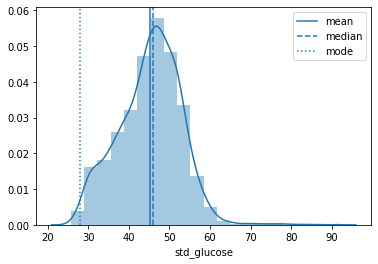

In [301]:
univariate_num(data, "std_glucose")

Korelacia medzi nasim atributom a y: -0.49715179548883787


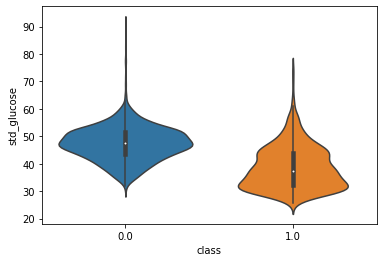

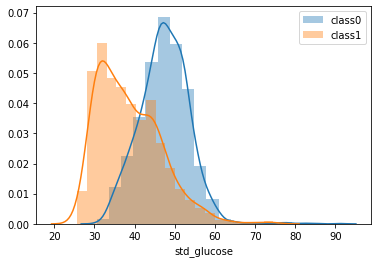

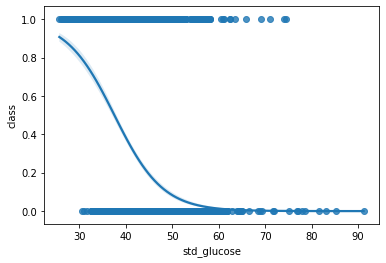

In [302]:
univariate_num_to_class(data, "std_glucose")

## Bivariate Analyza

In [303]:
def bivar_2nums(data, x, y, hue="class", figsize=None):
    clean = data.loc[(data[x].notna()) & (data[y].notna())]
    
    cor = stats.pearsonr(clean[x], clean[y])[0]
    print("Pearsonova korelacia:", cor)
    
    f(figsize)
    sns.scatterplot(data=data, x=x, y=y, hue="class")
    plt.show()
    
    if cor >= 0.7 or cor <= -0.7:

        regress = stats.linregress(clean[x], clean[y])
        print(regress)
        
        f(figsize)
        sns.regplot(data[x], data[y])
        plt.show()

def bivar_2cats(data, x, y, show_hue=False, hue="class", countplot=False, figsize=None):
    
    if show_hue == False:
    
        table = data.groupby(by=[y])[x].value_counts()
        table = table.unstack().fillna(0).astype("int32")
        
    else:
        
        table = data.groupby(by=[y,x])[hue].value_counts()
        table = table.unstack().unstack().fillna(0).astype("int32")
        
    
    f(figsize)
    sns.heatmap(data=table, cmap="Blues", annot=True, fmt="d")
    plt.show()
    
    if countplot == True:
        
        f(figsize)
        sns.countplot(data=data, x=x, hue=y)
        plt.show()
    

def bivar_numcat(data, num, cat, hue="class", distplot=False, figsize=None):
    
    f(figsize)
    sns.boxplot(data=data, x=cat, y=num)
    plt.show()
    
    f(figsize)
    sns.violinplot(data=data, x=cat, y=num, hue=hue)
    plt.show()
    
    if distplot == True:
        
        f(figsize)
        
        for c in data[cat].unique():
            if c is np.nan:
                continue
                
            sns.distplot(data[data[cat] == c][num], label=cat + ":" + c)
    
        plt.legend()
        plt.show()

- age - glucose_mean -> cim starsi, tym viac cukru v krvi?
- age - oxygen_mean -> cim starsi, tym viac kyslika v krvi?
- sex - glucose_mean -> to iste, lenze pre pohlavie
- sex - oxygen_mean
- sex - workclass
- sex - hours-per-week
- sex - income
- marital-status - relationship
- hours-per-week - income
- hours-per-week - workclass

__________

- ja este pohladam korelaciu pre fnlwgt

__________________

- este spravim pairplot a heatmapu korelacii pre vsetkych 8 atributov okolo merani

Na analyzu atributov, ktore su v rozdielnych data framoch, je potrebne ich joinut. Problemom vsak je, ze nemame idealny atribut, podla ktorych ich mozeme joinut. Je mozne ich joinut na zaklade mena, i ked to nie je idealne, lebo v prvom rade, co by sme spravili, keby sme mali viacero pacientov s rovnakymi menami? Este je mozne pouzit ako index kombinaciu atributov mena a adresy, no stale, toto nie je spravny approach, akym by sme chceli joinovat data. Idealne by mal existovat nejake idcko, podla ktoreho by sa data joinuli, avsak v obidvoch dataframoch sa pouziva iny index.

Druhym problemom, ktory nachadzame vo vacsom dataframe je, ze existuje viacero zaznamom pre konkretneho cloveka. Konkretne existuje 50 duplikatov, kedy pacient ma prave 2 zaznamy. Po nahladnuty do zaznamov sme si vsimli, ze ono to vyzera, ze ako keby boli nechcene splitnute dane data medzi dane 2 zaznamy. Niektore namerane hodnoty su nachlp presne, co len posilnuje trvdenie, ze ide o rovnakeho pacienta.

Na teraz nie je potrebne dane zaznamy mergovat, no toto je jedna z veci, ktore budeme musiet pocas druhej fazy projektu spravit.

POTOM JE POTREBNE SKONTROLOVAT, CI NAOZAJ SU ROVNAKE MENA PACIENTOV (TO UZ SOM KONTROLOVAL, POKIAL SA NEMYLIM), AKO AJ ADRESY

In [304]:
print(len(df1))
df1["name"].nunique() == len(df1)

3933


True

In [305]:
print(df2["name"].nunique() == len(df2))
df2["name"].describe()

False


count             3983
unique            3933
top       Joey Beabout
freq                 2
Name: name, dtype: object

In [306]:
df1_ = df1.set_index("name").drop(columns=["address"])
df2_ = df2.set_index("name")
data = df2_.join(df1_, how="left").reset_index()
data

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,...,income,medical_info,native-country,hours-per-week,capital-loss,workclass,simple-edu,age,sex,date_of_birth
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",White,Divorced,Other-service,f,3.0,Not-in-family,0.248354,119.7890625,...,<=50K,"{'mean_oxygen':'1.647157191','std_oxygen':'14....",?,45.0,0.0,Local-gov,5th-6th,56,Female,1962-12-27
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",White,Divorced,Sales,f,10.0,Not-in-family,-0.416735,NaN,...,<=50K,"{'mean_oxygen':'1.380434783','std_oxygen':'15....",United-States,40.0,0.0,Self-emp-not-inc,Some-college,50,Male,1969-05-22
2,Aaron Gann,59685 Thomas Extension Apt. 142\r\nFieldsborou...,Black,Never-married,?,f,4.0,Other-relative,-0.118753,NaN,...,<=50K,"{'mean_oxygen':'78.30183946','std_oxygen':'79....",United-States,30.0,0.0,?,7th-8th,25,Male,1994-07-26
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen,...",Black,Widowed,Transport-moving,f,9.0,Not-in-family,2.232677,104.8203125,...,<=50K,"{'mean_oxygen':'1.489130435','std_oxygen':'10....",United-States,40.0,0.0,Local-gov,HS-grad,42,Female,1977-04-16
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",White,Never-married,Sales,F,9.0,Own-child,-0.154086,134.84375,...,<=50K,"{'mean_oxygen':'1.194816054','std_oxygen':'11....",United-States,40.0,0.0,Private,HS-grad,-4900,Female,1969-12-11 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Young Provines,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA...",White,Married-civ-spouse,Exec_managerial,FALSE,11.0,Husband,0.087649,114.8515625,...,>50K,"{'mean_oxygen':'3.16722408','std_oxygen':'22.3...",United-States,43.0,0.0,Private,Assoc-voc,51,Male,1968-05-19
3979,Zachary Grandfield,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, ...",Black,Married-civ-spouse,Transport-moving,f,10.0,Husband,19.188118,50.3671875,...,<=50K,"{'mean_oxygen':'2.994147157','std_oxygen':'21....",United-States,40.0,0.0,Private,Some-college,-5800,Male,1960/12/18
3980,Zachary Miller,"96654 Marc Stream\r\nEast Cassandra, VT 84597",White,Married-civ-spouse,Adm-clerical,f,13.0,Husband,-0.023296,130.0,...,>50K,"{'mean_oxygen':'1.62541806','std_oxygen':'14.0...",?,50.0,1902.0,Private,Bachelors,46,Male,1973-08-07
3981,Zachary Seltzer,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",White,Divorced,Sales,f,7.0,Not-in-family,19.777657,48.5078125,...,<=50K,"{'mean_oxygen':'66.53260870000001','std_oxygen...",United-States,40.0,0.0,Private,11th,64,Female,1955-06-08 00 00 00


### age - mean_glucose

In [307]:
print("Pocet zapornych hodnot:", (data["age"] < 0).sum())
neg_age = data["age"][(data["age"] < 0)]
neg_age

Pocet zapornych hodnot: 200


4      -4900
20     -3700
44     -5200
47     -5800
58     -5200
        ... 
3849   -3900
3855   -5600
3928   -5900
3951   -5600
3979   -5800
Name: age, Length: 200, dtype: int64

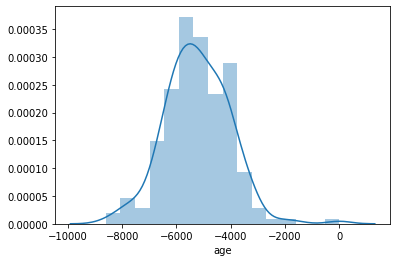

In [308]:
sns.distplot(neg_age)

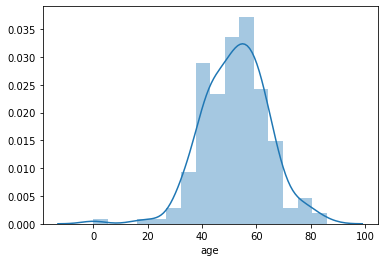

In [309]:
neg_age = neg_age / -100
sns.distplot(neg_age)

Pocet normalnych hodnot: 3577


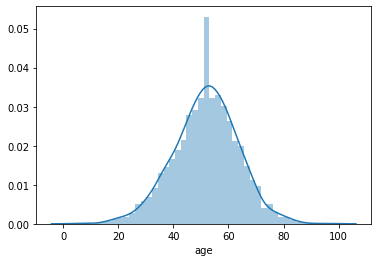

In [310]:
print("Pocet normalnych hodnot:", ((data["age"] > 0) & (data["age"] <= 100)).sum())
norm_age = data["age"][(data["age"] > 0) & (data["age"] <= 100)]
sns.distplot(norm_age)

Pocet velkych kladnych hodnot: 206


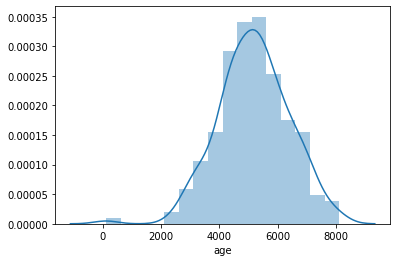

In [311]:
print("Pocet velkych kladnych hodnot:", (data["age"] > 100).sum())
pos_age = data["age"][data["age"] > 100]
sns.distplot(pos_age)

In [312]:
print(len(neg_age) + len(norm_age) + len(pos_age) == len(data))

True


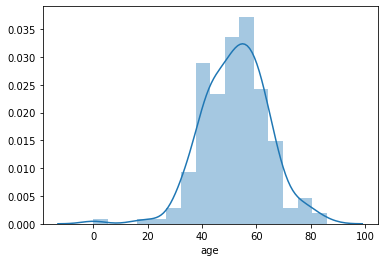

In [313]:
pos_age = pos_age / 100
sns.distplot(neg_age)

In [314]:
data["correct_age"] = data["age"].copy()

In [315]:
def fix_age(row):
    vek = row["age"]
    
    if vek < 0: 
        row["correct_age"] = vek / -100
    elif vek > 100:
        row["correct_age"] = vek / 100
        
    return row
    

data = data.apply(fix_age, axis=1)
data

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,...,medical_info,native-country,hours-per-week,capital-loss,workclass,simple-edu,age,sex,date_of_birth,correct_age
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",White,Divorced,Other-service,f,3.0,Not-in-family,0.248354,119.7890625,...,"{'mean_oxygen':'1.647157191','std_oxygen':'14....",?,45.0,0.0,Local-gov,5th-6th,56,Female,1962-12-27,56.0
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",White,Divorced,Sales,f,10.0,Not-in-family,-0.416735,NaN,...,"{'mean_oxygen':'1.380434783','std_oxygen':'15....",United-States,40.0,0.0,Self-emp-not-inc,Some-college,50,Male,1969-05-22,50.0
2,Aaron Gann,59685 Thomas Extension Apt. 142\r\nFieldsborou...,Black,Never-married,?,f,4.0,Other-relative,-0.118753,NaN,...,"{'mean_oxygen':'78.30183946','std_oxygen':'79....",United-States,30.0,0.0,?,7th-8th,25,Male,1994-07-26,25.0
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen,...",Black,Widowed,Transport-moving,f,9.0,Not-in-family,2.232677,104.8203125,...,"{'mean_oxygen':'1.489130435','std_oxygen':'10....",United-States,40.0,0.0,Local-gov,HS-grad,42,Female,1977-04-16,42.0
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",White,Never-married,Sales,F,9.0,Own-child,-0.154086,134.84375,...,"{'mean_oxygen':'1.194816054','std_oxygen':'11....",United-States,40.0,0.0,Private,HS-grad,-4900,Female,1969-12-11 00:00:00,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Young Provines,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA...",White,Married-civ-spouse,Exec_managerial,FALSE,11.0,Husband,0.087649,114.8515625,...,"{'mean_oxygen':'3.16722408','std_oxygen':'22.3...",United-States,43.0,0.0,Private,Assoc-voc,51,Male,1968-05-19,51.0
3979,Zachary Grandfield,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, ...",Black,Married-civ-spouse,Transport-moving,f,10.0,Husband,19.188118,50.3671875,...,"{'mean_oxygen':'2.994147157','std_oxygen':'21....",United-States,40.0,0.0,Private,Some-college,-5800,Male,1960/12/18,58.0
3980,Zachary Miller,"96654 Marc Stream\r\nEast Cassandra, VT 84597",White,Married-civ-spouse,Adm-clerical,f,13.0,Husband,-0.023296,130.0,...,"{'mean_oxygen':'1.62541806','std_oxygen':'14.0...",?,50.0,1902.0,Private,Bachelors,46,Male,1973-08-07,46.0
3981,Zachary Seltzer,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",White,Divorced,Sales,f,7.0,Not-in-family,19.777657,48.5078125,...,"{'mean_oxygen':'66.53260870000001','std_oxygen...",United-States,40.0,0.0,Private,11th,64,Female,1955-06-08 00 00 00,64.0


In [316]:
data["mean_oxygen"] = np.nan
data["std_oxygen"] = np.nan
data["kurtosis_oxygen"] = np.nan
data["skewness_oxygen"] = np.nan

In [317]:
data = data.apply(get_oxygen_stats, axis=1)
data

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,...,workclass,simple-edu,age,sex,date_of_birth,correct_age,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",White,Divorced,Other-service,f,3.0,Not-in-family,0.248354,119.7890625,...,Local-gov,5th-6th,56,Female,1962-12-27,56.0,1.647157,14.792746,10.657147,129.868327
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",White,Divorced,Sales,f,10.0,Not-in-family,-0.416735,NaN,...,Self-emp-not-inc,Some-college,50,Male,1969-05-22,50.0,1.380435,15.159241,12.617156,171.150528
2,Aaron Gann,59685 Thomas Extension Apt. 142\r\nFieldsborou...,Black,Never-married,?,f,4.0,Other-relative,-0.118753,NaN,...,?,7th-8th,25,Male,1994-07-26,25.0,78.301839,79.997032,0.071512,-1.929004
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen,...",Black,Widowed,Transport-moving,f,9.0,Not-in-family,2.232677,104.8203125,...,Local-gov,HS-grad,42,Female,1977-04-16,42.0,1.489130,10.412594,14.541232,304.902115
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",White,Never-married,Sales,F,9.0,Own-child,-0.154086,134.84375,...,Private,HS-grad,-4900,Female,1969-12-11 00:00:00,49.0,1.194816,11.190716,14.929069,276.348177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Young Provines,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA...",White,Married-civ-spouse,Exec_managerial,FALSE,11.0,Husband,0.087649,114.8515625,...,Private,Assoc-voc,51,Male,1968-05-19,51.0,3.167224,22.307530,7.591025,59.745587
3979,Zachary Grandfield,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, ...",Black,Married-civ-spouse,Transport-moving,f,10.0,Husband,19.188118,50.3671875,...,Private,Some-college,-5800,Male,1960/12/18,58.0,2.994147,21.886316,8.284256,72.027240
3980,Zachary Miller,"96654 Marc Stream\r\nEast Cassandra, VT 84597",White,Married-civ-spouse,Adm-clerical,f,13.0,Husband,-0.023296,130.0,...,Private,Bachelors,46,Male,1973-08-07,46.0,1.625418,14.089186,12.234726,177.121903
3981,Zachary Seltzer,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",White,Divorced,Sales,f,7.0,Not-in-family,19.777657,48.5078125,...,Private,11th,64,Female,1955-06-08 00 00 00,64.0,66.532609,86.290187,0.942294,-0.611598


In [318]:
data["mean_glucose"] = data["mean_glucose"].apply(lambda row: np.nan if row is not np.nan and "?" in row else row)
data["mean_glucose"] = data["mean_glucose"].astype("float32")

Pearsonova korelacia: -0.27834097366438837


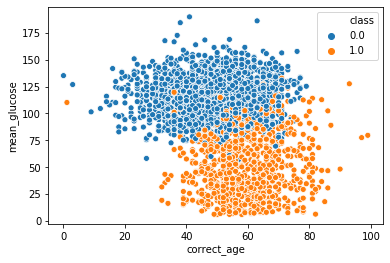

In [319]:
bivar_2nums(data, "correct_age", "mean_glucose")

### age - mean_oxygen

In [320]:
data[["correct_age","mean_oxygen"]].corr()

,correct_age,mean_oxygen
correct_age,1.000000,0.186901
mean_oxygen,0.186901,1.000000


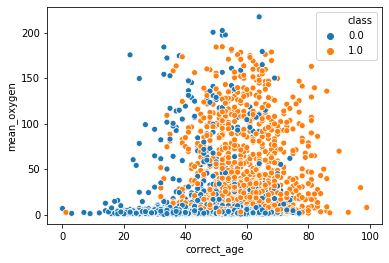

In [321]:
sns.scatterplot(data=data, x="correct_age", y="mean_oxygen", hue="class")

### sex - mean_glucose

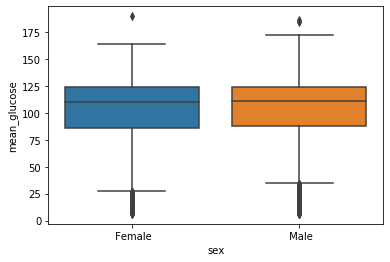

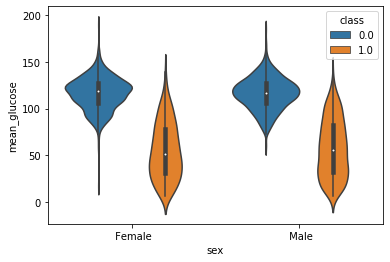

In [322]:
bivar_numcat(data, num="mean_glucose", cat="sex")

### sex - mean_oxygen

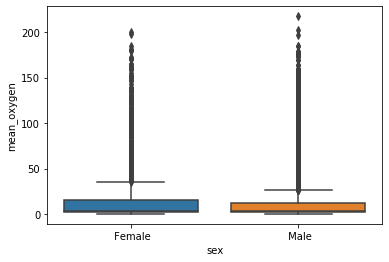

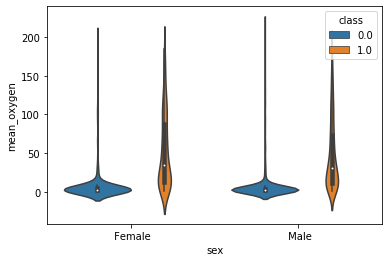

In [323]:
bivar_numcat(data=data, num="mean_oxygen", cat="sex")

### sex - workclass

In [324]:
data["workclass"]

0               Local-gov
1        Self-emp-not-inc
2                       ?
3               Local-gov
4                 Private
              ...        
3978              Private
3979              Private
3980              Private
3981              Private
3982              Private
Name: workclass, Length: 3983, dtype: object

In [325]:
data["workclass"] = data["workclass"].apply(lambda row: row.strip() if row is not np.nan else row)
data["workclass"] = data["workclass"].apply(lambda row: np.nan if row == "?" else row)
data["workclass"]

0              Local-gov
1       Self-emp-not-inc
2                    NaN
3              Local-gov
4                Private
              ...       
3978             Private
3979             Private
3980             Private
3981             Private
3982             Private
Name: workclass, Length: 3983, dtype: object

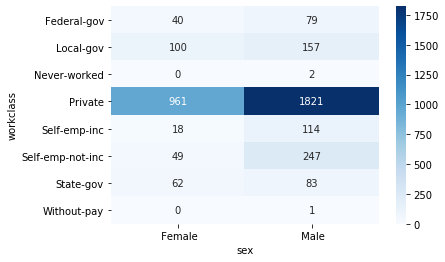

In [326]:
bivar_2cats(data, x="sex", y="workclass")

### sex - hours-per-week

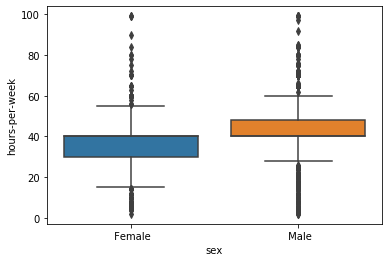

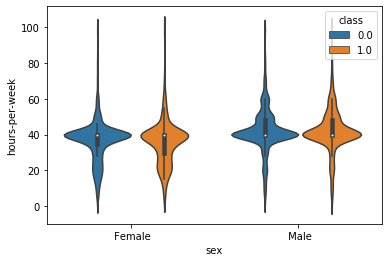

In [327]:
bivar_numcat(data=data, num="hours-per-week", cat="sex")

### sex - income

In [328]:
data["income"] = data["income"].apply(lambda row: row.strip() if row is not np.nan else row)
data["income"].value_counts()

<=50K    3002
>50K      970
Name: income, dtype: int64

In [329]:
table = data.groupby(by=["income"])["sex"].value_counts()
table = table.unstack().fillna(0).astype("int32")
table

sex,Female,Male
income,,
<=50K,1172,1830
>50K,143,827


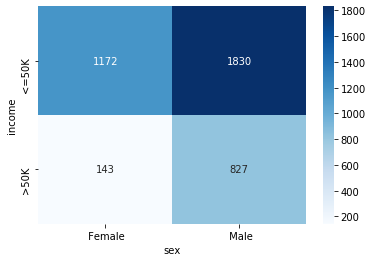

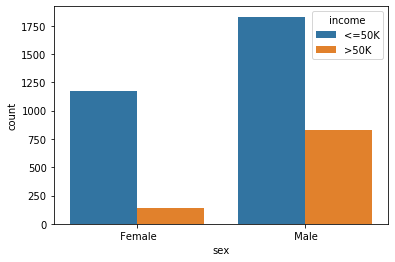

In [330]:
bivar_2cats(data=data, x="sex", y="income", countplot=True)

### marital-status - relationship

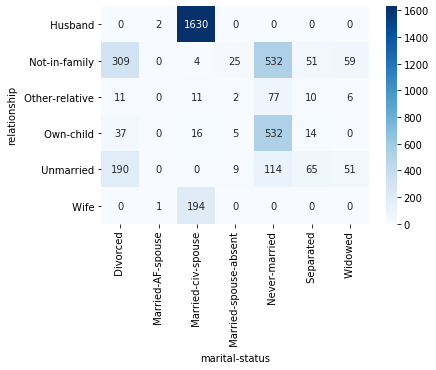

In [331]:
bivar_2cats(data=data, x="marital-status", y="relationship")

### hours-per-week - income

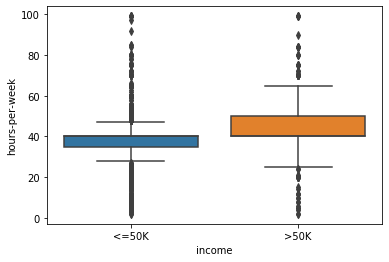

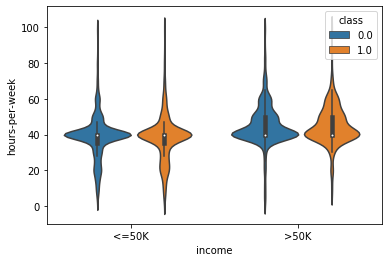

In [332]:
bivar_numcat(data=data, num="hours-per-week", cat="income")

### hours-per-week - workclass

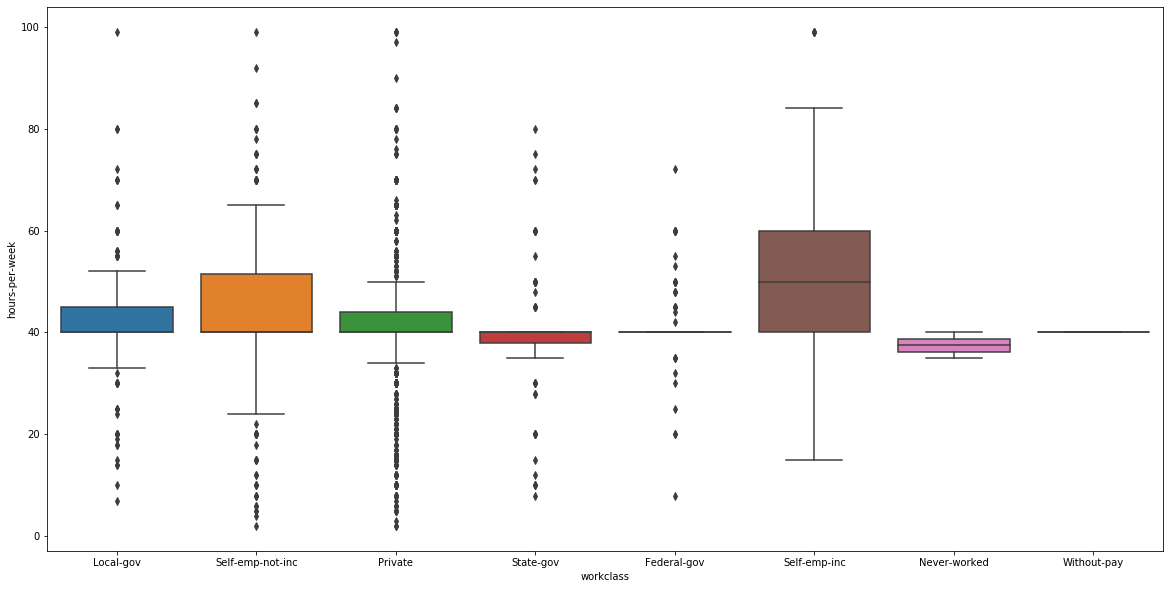

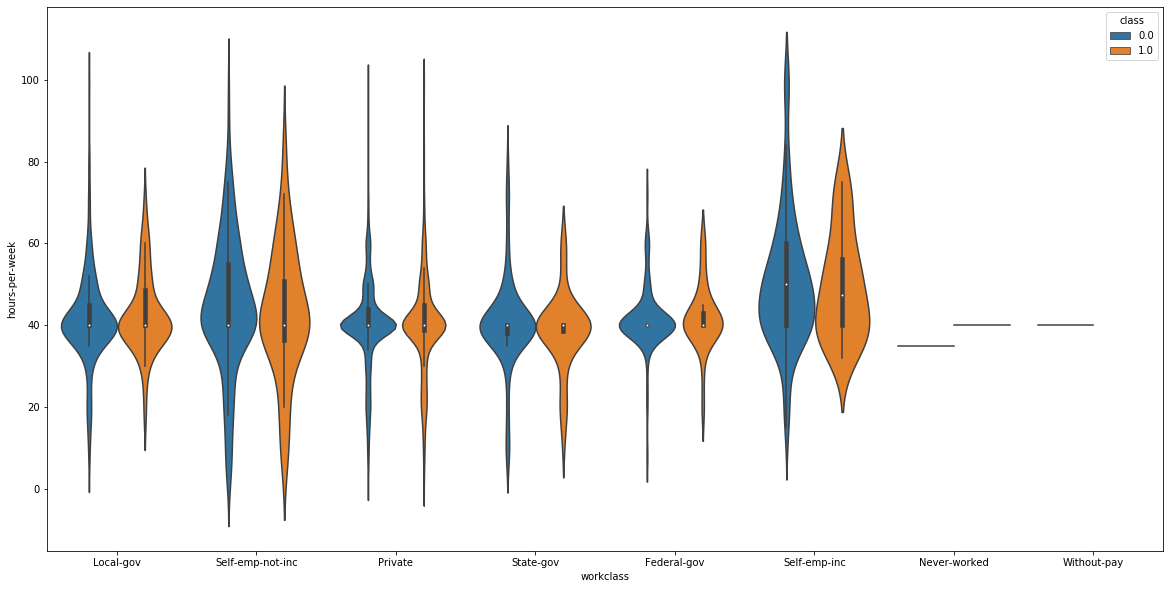

In [333]:
bivar_numcat(data=data, num="hours-per-week", cat="workclass", figsize=(20,10))

### race - income

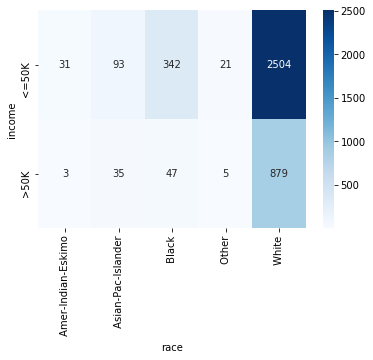

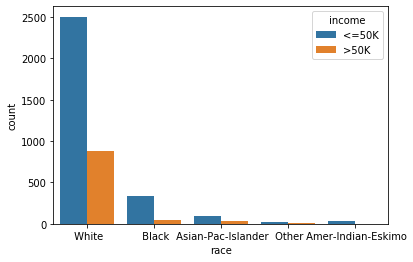

In [334]:
bivar_2cats(data=data, x = "race", y = "income", countplot = True)

### race - hours-per-week

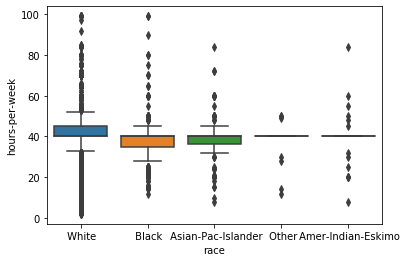

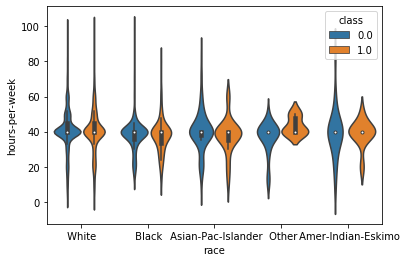

In [335]:
bivar_numcat(data, num ="hours-per-week", cat = "race")

### race - workclass

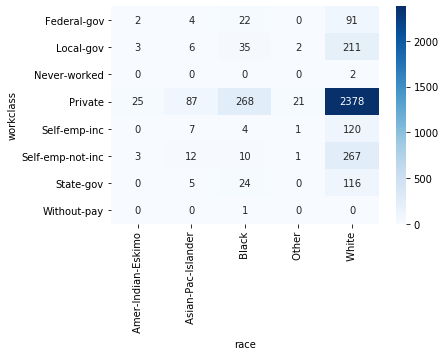

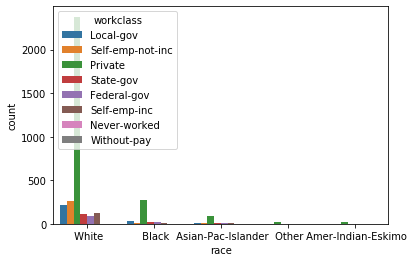

In [336]:
bivar_2cats(data=data, x = "race", y = "workclass" , countplot = True)

### age - pregnant

TOTO musim opravit na correct_pregnant

In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   race              3969 non-null   object 
 3   marital-status    3969 non-null   object 
 4   occupation        3969 non-null   object 
 5   pregnant          3973 non-null   object 
 6   education-num     3972 non-null   float64
 7   relationship      3965 non-null   object 
 8   skewness_glucose  3967 non-null   float64
 9   mean_glucose      3570 non-null   float32
 10  capital-gain      3970 non-null   float64
 11  kurtosis_glucose  3972 non-null   float64
 12  education         3973 non-null   object 
 13  fnlwgt            3969 non-null   float64
 14  class             3965 non-null   float64
 15  std_glucose       3573 non-null   float64
 16  income            3972 non-null   object 


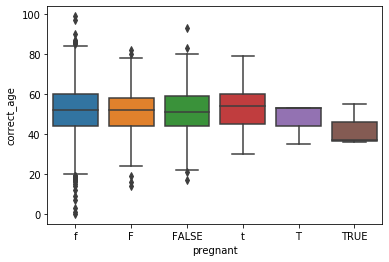

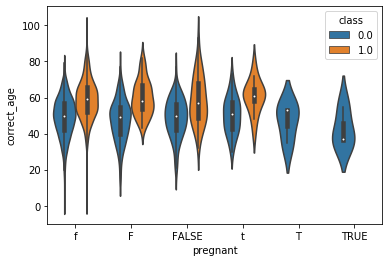

In [337]:
bivar_numcat(data=data, num="correct_age", cat="pregnant")

### age - income

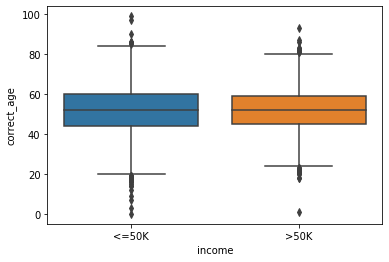

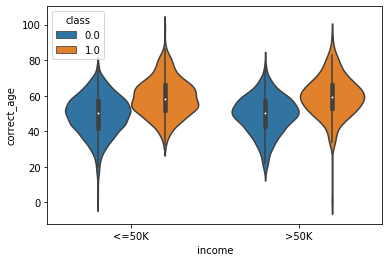

In [145]:
bivar_numcat(data, num = "correct_age", cat = "income")

### pregnant - glucose_mean

### pregnant - oxygen_mean

### education - education_num

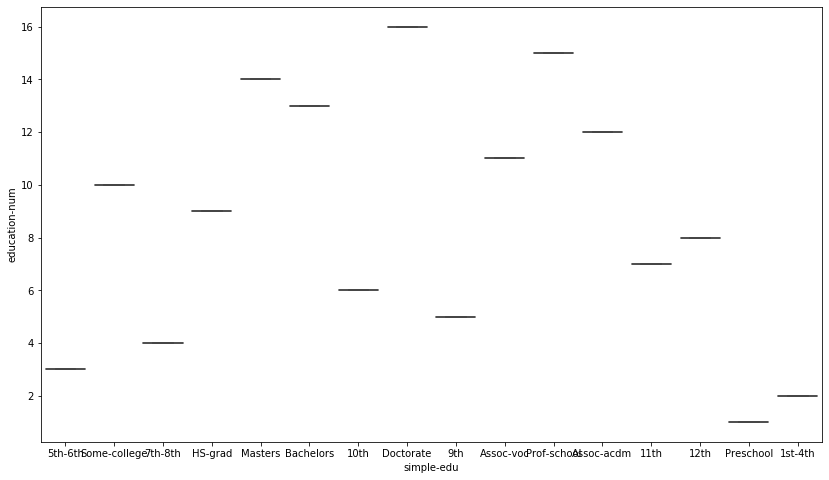

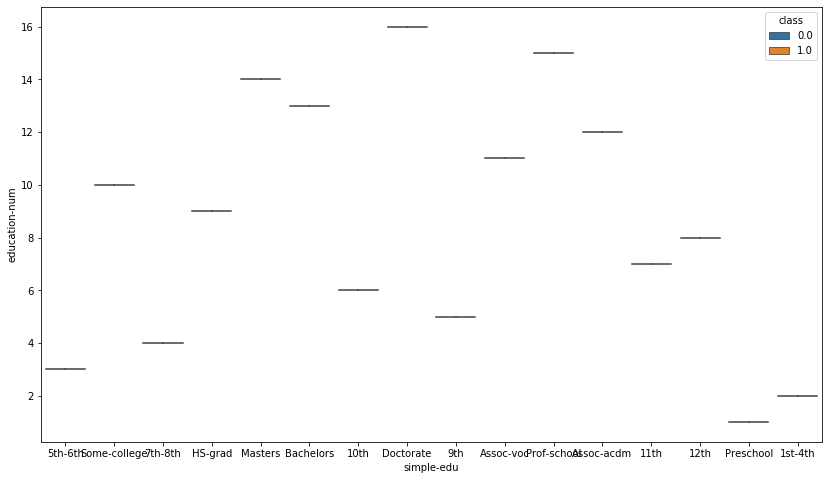

In [153]:
bivar_numcat(data, num = "education-num", cat = "simple-edu",figsize = (14,8))

Toto nema ziadnu vypovednu hodnotu

### education - workclass

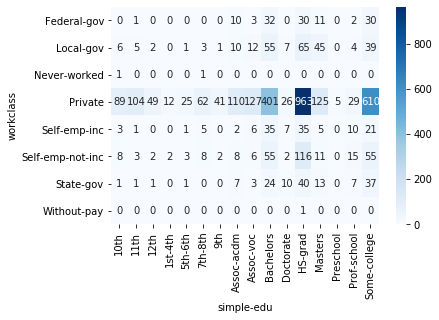

In [154]:
bivar_2cats(data=data, x = "simple-edu", y = "workclass")

### income - occupation

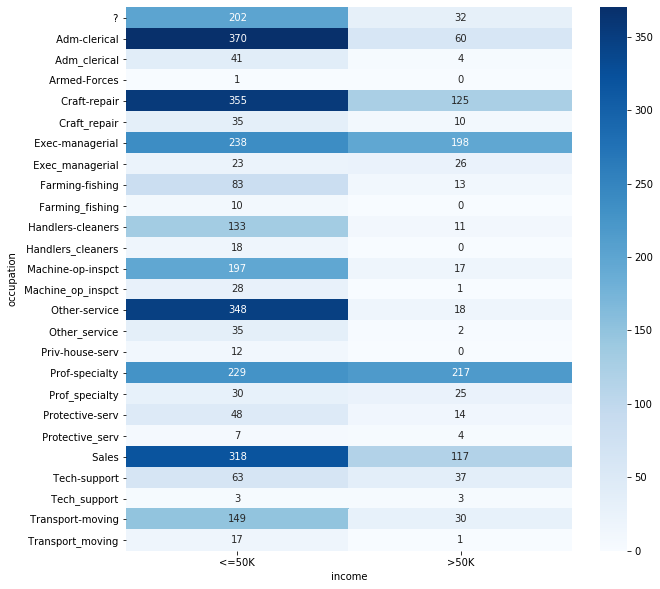

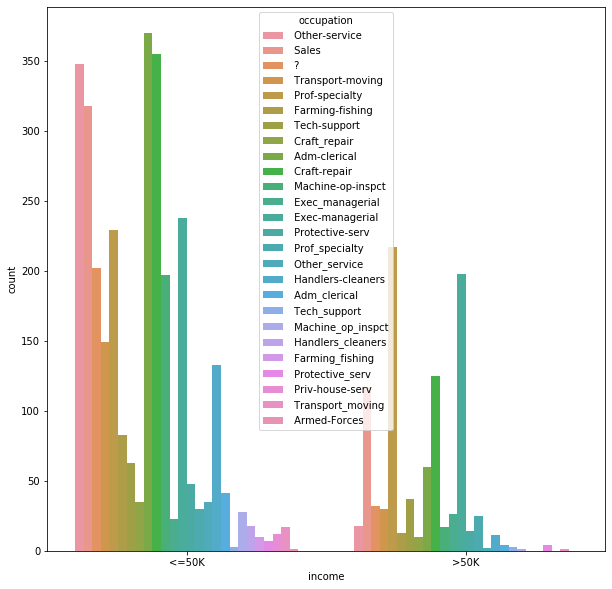

In [160]:
bivar_2cats(data=data, x = "income", y = "occupation", figsize=(10,10), countplot = True)

### income - workclass

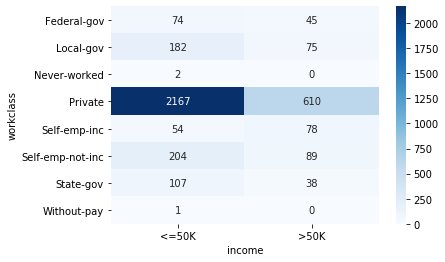

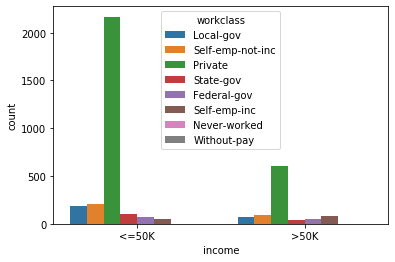

In [162]:
bivar_2cats(data=data, x = "income", y = "workclass", countplot = True)

### Pairplot pre vsetky merania 

In [ ]:
l = list(data.columns.values)

oxygen_measurements = []
glucose_measurements = []

for li in l:
    if "oxygen" in li:
        oxygen_measurements.append(li)
    elif "glucose" in li:
        glucose_measurements.append(li)

In [ ]:
sns.pairplot(data=data[oxygen_measurements+["class"]],hue="class")

In [ ]:
sns.pairplot(data=data[glucose_measurements+["class"]],hue="class")

In [ ]:
measurements = glucose_measurements + oxygen_measurements

sns.pairplot(data=data[measurements+["class"]],hue="class")

In [ ]:
korelacie = data[measurements].corr()

f(figsize=(25,20))
sns.heatmap(data=korelacie, cmap="coolwarm", annot=True, fmt=".3f", square=True)

In [ ]:
def heatmap_mask(data, threshold=0.4):
    data = data.copy()
    
    for i in data.index:
        clean = False
        row = data.loc[i]
        for c in data.columns:
            if i == c:
                clean = True
                
            if clean == True:
                row[c] = 1
                
            else:
                val = row[c]
                if val == 1 or val < threshold and val > -threshold:
                    row[c] = 1
                else:
                    row[c] = 0

    data = data.astype("bool")
    return data
        

In [ ]:
maska = heatmap_mask(korelacie, threshold=0.5)

f(figsize=(25,20))
sns.heatmap(data=korelacie, cmap="coolwarm", annot=True, fmt=".3f", square=True, mask=maska)

Skontrolujeme, ci sme nasli vsetky vztahy medzi ciselnymi atributmi..

In [ ]:
vsetky_corr = data.corr()

#trosku to tam upracem, aby sa mi lahsie hladali korelacie

#mazem riadky, v ktorych su same slabe korelacie
riadky_nazmazanie = vsetky_corr[((vsetky_corr < 0.4) | (vsetky_corr == 1)).all()]

vsetky_corr = vsetky_corr.drop(index=riadky_nazmazanie.index)

#vymenim stlpce za riadky a znova vymazem riadky, kde su same male korelacie
vsetky_corr = vsetky_corr.stack().unstack(0)

riadky_nazmazanie = vsetky_corr[(vsetky_corr < 0.4).all(axis=1)]

vsetky_corr.drop(index=riadky_nazmazanie.index)

Jedine relevantne korelacie medzi ciselnymi atributmi sa nachadzaju medzi atributmi merania glukozy, resp. kysliku, ako aj medzi vsetkymi tymito atributmi merania a predikovanym atributom - class

# HYPOTEZY

### Hypoteza 1:

H0: Cukrovkari a nie-cukrovkari maju rovnaku priemernu hodnotu kysliku v krvi

H1: Cukrovkari a nie-cukrovkari maju odlisnu priemernu hodnotu kysliku v krvi

In [ ]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

def cohen_d(x, y):
    len_x = len(x)
    len_y = len(y)
    s = np.sqrt(((len_x-1) * np.std(x, ddof=1)**2 
                 + (len_y-1) * np.std(y, ddof=1)**2) / (len_x + len_y - 2))
    d = (np.abs(np.mean(x) - np.mean(y))) / s
    return d

In [ ]:
def test_normality(data, attr, hue, hue_values, clean_outliers_multiple_times=False, distplot=True):
    
    distributions = []
    names = []
    
    for h in hue_values:
        distributions.append(data.loc[(data[hue] == h) & (data[attr].notna())][attr])
        names.append(attr + "(" + hue + "=" + str(h) + ")")
    
    for i in range(len(hue_values)):
        while len(identify_outliers(distributions[i])) > 0:
            distributions[i] = distributions[i].drop(index=identify_outliers(distributions[i]).index)
            if clean_outliers_multiple_times == False:
                break

        sm.ProbPlot(distributions[i], fit=True).qqplot(line='45', label=names[i])
        plt.legend()
        plt.show()
        
    for i in range(len(hue_values)):
        sns.distplot(distributions[i], label=names[i])
        
    plt.legend()
    plt.show()
    
    for i in range(len(hue_values)):
        print(names[i], "p-value:", stats.shapiro(distributions[i])[1])
    
    return distributions

In [ ]:
def mann_whitney(distributions):
    pvalue = stats.mannwhitneyu(distributions[0], distributions[1])[1]

    print("Hodnota pvalue:", pvalue)
    if pvalue < 0.05:
        print("Zamietame hypotezu H0")
        
        cohen_value = cohen_d(distributions[0], distributions[1])
        
        len1 = len(distributions[0]) 
        len2 = len(distributions[1]) 

        power = sm_stats.power.tt_ind_solve_power(effect_size=cohen_value, nobs1=len1, alpha=0.05, 
                                          power=None, ratio=len2/len1)

        print("Sila testu:", power)
        
        if power > 0.8:
            print("Dostatocne velka sila testu")
        else:
            print("Nedostatocne velka sila testu")
        
    else:
        print("Nedokazeme zamietnut hypotezu H0")
    

In [ ]:
distributions = test_normality(data, "mean_oxygen", "class", [0,1])

Ako mozno vidiet, dane atributy nemaju normalnu distribuciu, je teda potrebne pouzit nie-parametricke statisticke testy, konkretne pouzijeme **Mann-Whitney U test**.

In [ ]:
mann_whitney(distributions)

### Hypoteza 2:

H0: Outliery atributu age su len chybne napisane veky, ktore boli prenasobene 100, resp. -100. Po vydeleni danou konstatou na kladne hodnoty, pochadzaju dane hodnoty z rovnakej distribucie ako spravne zapisane veky.

H1: Outliery atributu age nie su chybne napisane veky, ktore boli prenasobene 100, resp. -100. Po vydeleni danou konstatou na kladne hodnoty, dane hodnoty nepochadzaju z rovnakej distribucie ako spravne zapisane veky.

In [ ]:
neg_age = data["age"][data["age"] < 0] / -100
pos_age = data["age"][data["age"] >= 100] / 100
norm_age = data["age"][(data["age"] > 0) & (data["age"] < 100)]

In [ ]:
#odstranime outliery
neg_age = neg_age.drop(index=identify_outliers(neg_age).index).values
pos_age = pos_age.drop(index=identify_outliers(pos_age).index).values
norm_age = norm_age.drop(index=identify_outliers(norm_age).index).values
repaired_age = np.array(list(neg_age) + list(pos_age))

In [ ]:
sns.distplot(repaired_age, label="repaired")
sns.distplot(norm_age, label="normal")

plt.legend()
plt.show()

In [ ]:
_ = sm.ProbPlot(repaired_age, fit=True).qqplot(line='45')

In [ ]:
_ = sm.ProbPlot(norm_age, fit=True).qqplot(line='45')

In [ ]:
print("P-value:", stats.shapiro(repaired_age)[1])
print("P-value:", stats.shapiro(norm_age)[1])

Budeme znova musiet pouzit nie-parametrovy test - **Mann-Whitney U test**

In [ ]:
mann_whitney((repaired_age, norm_age))

Nedokazeme zamietnut H0, teda nezamietame fakt, ze dane nerealne hodnoty mohli byt vytvorene sposobom, aky je opisany v hypoteze.

### Hypoteza 3

H0: Muzi odpracuju rovnaky pocet hodin ako zeny

H1: Muzi pracuju viac/menej hodin ako zeny. 

In [ ]:
data["sex"] = data["sex"].apply(lambda row: row.strip())

distributions = test_normality(data, "hours-per-week", "sex", ["Female", "Male"])

Znova nejde o normalnu distribuciu. Ideme pouzit nie-parametrovy test - **Mann-Whitney U test**

In [ ]:
mann_whitney(distributions)

S velkou silou testu zamiestame hypotezu H0, teda tvrdime, ze muzi a zeny pracuju rozdielny pocet hodin

# PROBLEMY

#### Možné problémy v dátach
	- nevhodná štruktúra dát (dáta nie sú v tabuľkovej podobe alebo jedna entita je opísaná viacerými riadkami tabuľky)
	- duplicitné záznamy, resp. nejednoznačné mapovanie medzi záznamami
	- nejednotné formáty dát
	- chýbajúce hodnoty
	- vychýlené (odľahlé) hodnoty (angl. outliers)
	- a ďalšie

In [ ]:
data = pd.read_csv("./data/other_train.csv", index_col=0)

In [ ]:
#moje su len vo vacsom dataframe
attributes_marcel = ["marital-status", "pregnant", "relationship", "education", "education-num", "occupation", 
                     "income", "fnlwgt", "workclass", "hours-per-week", "capital-gain", "capital-loss", "medical_info", 
                     "class"]

data = data[attributes_marcel]

## 50 pacientov vo vacsom dataframe je zapisany pomocou 2 zaznamov, pricom nejde o duplikaty, ale skor o nejake rozbitie udajov. Bude potrebne ich nejak mergnut

## Vo vacsine kategorickych atributoch je na zaciatku hodnot whitespace

#### age
- V tomto atribute je velke mnozstvo outlierov, ktorych hodnoty nie su realne. Toto sme uz riesili a aj pomocou testu sme dokazali nezamietnut hypotezu o tom, ako dane nerealne hodnoty vieme namapovat na realne

#### marital-status
- Je tam viacero hodnot, ktorych pocet je strasne maly. Asi by bolo vhodne spojit vsetky hodnoty, ktore tvrdia, ze dany clovek je married

#### pregnant
- Vela rovnakych hodnot (f, F, FALSE...), ktore reprezentuju rovnaku hodnotu.

#### education
- Tu je potrebne zmensit pocet kategorii, kedze vacsina z nich je irelevantna uz len z toho dovodu, ze su malo pocetne. Medzi prvou optimalizaciou je, aby vacsina kategorii, ktore riesia este deti, teda tych pacientov, ktori este chodia na high-school, resp. este nizsie, aby boli oni reprezentovani jednou kategoriou. Aj tak ich pocetnost v jednotlivych kategoriach je minimalna, tak im iba prospeje, ked sa vytvori nova kategoria.
- Vytvorime kategoriu, ktora bude obsahovat preschool a skupinu K-12, co reprezentuje 12 rocnikov od elementary school po high school. Nieco na tento sposob sme uz skusali pri analyze vyssie.

#### occupation
- Tu je problem s velkym poctom kategorii, ktore nie su relevantne, kedze su malopocetne zastupene. Jednym s moznych rieseni je dane malopocetne hodnoty zoskupit a nazvat napriklad Other.
- Vsetky, resp. vacsina hodnot je zduplikovanych - jedna polovica pouziva ako separator "-", druha "_"
- Existuje tu hodnota ?, co reprezentuje missing values

#### income
- Duplicitne hodnoty, ktore su len inak sformatovane.

#### workclass
- Aj tu mame ?, ktory reprezentuje missing values

#### capital-gain a capital-loss
- Tento atribut mozme rovno vymazat, zo 90% hodnot sa rovnaju 0, co usudzujem znamena missing value
- A aj keby 0 neznamenala missing value a tieto atributy su zviazane, tak najdeme pomaly 90% zaznamov, kde obidve hodnoty sa rovnaju 0
- Pre istotu sme skusali sa pozriet aj na nenulove hodnoty, ci maju vobec nejaku vypovednu hodnotu na y - class, no neboli nicim vyznamne...

#### medical_info
- Tento atribut obsahuje 4 atributy k obsahu kyslika v krvi pacienta, tieto atributy v ramci analyzy sme uz rozdelili
- Pokial pacientovi chybaju aj informacie o glukoze, aj o kysliku, tak rovno ho mozeme vymazat, lebo vacsina tychto atributov, ktore su merane z krvy, maju silnu korelaciu k samotnemu y - class

# OTAZKA:

Mame pre jednotlive atributy urcit sposob, akym nahradit missing value, resp. pracu s outliermi?